# Working with Linear Models

Simple and fast and used as the baseline model.

- Regression: Linear regression
- Classification: Logistic Regression

Can underfit when: n_features << n_samples  ---> engineering new features can help here.

Hard to beat when `n_features` is large.

## Linear Models for Regression

In [1]:
import pandas as pd
import numpy as np

df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins_regression.csv"


penguins_df = pd.read_csv(df_path)


# Preview the dataset
penguins_df.head()

Flipper Length (mm)  Body Mass (g)
0                181.0         3750.0
1                186.0         3800.0
2                195.0         3250.0
3                193.0         3450.0
4                190.0         3650.0

> We want to predict the body mass using the Flipper Lenght of a penguin

Text(0.5, 1.0, 'Body mass as a function of flipper length')

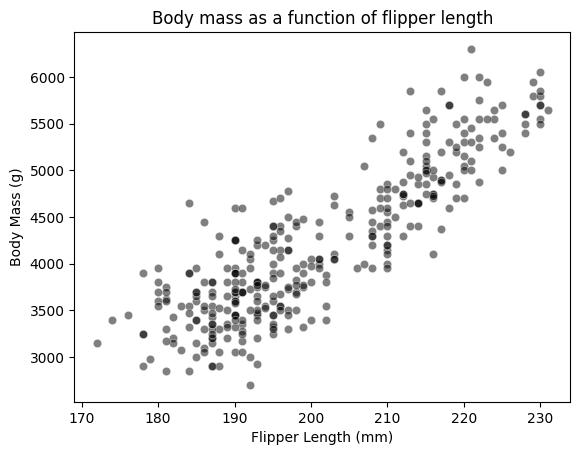

In [2]:
import seaborn as sns

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"


data, target = penguins_df[[feature_name]], penguins_df[target_name]


ax = sns.scatterplot(
            data=penguins_df,
            x = feature_name,
            y = target_name,
            color = "black",
            alpha = 0.5            
                    )

ax.set_title("Body mass as a function of flipper length")

In [3]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

# fit the model to the data
linear_regression.fit(data, target)


# coef and intercept
weight_flipper_length = linear_regression.coef_
intercept_body_mass = linear_regression.intercept_

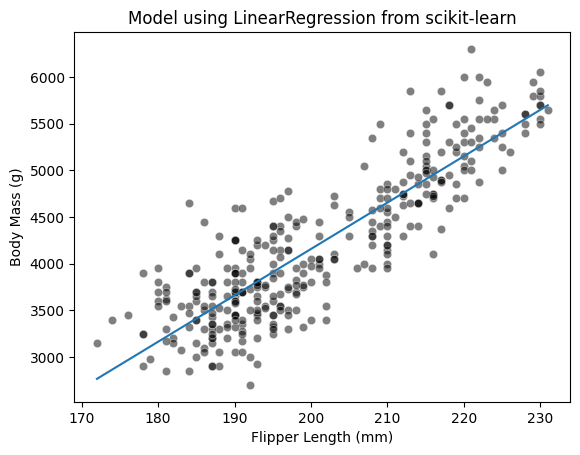

In [4]:
import numpy as np
import matplotlib.pyplot as plt

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass
)


sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

In [5]:
# Error Metrics

from sklearn.metrics import mean_squared_error

pred_body_mass = linear_regression.predict(data)

model_error = mean_squared_error(target, pred_body_mass)

print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


> A linear regression model minimizes the mean squared error on the training
set. This means that the parameters obtained after the fit (i.e. `coef_` and
`intercept_`) are the optimal parameters that minimizes the mean squared
error. In other words, any other choice of parameters would yield a model with
a higher mean squared error on the training set.

> The mean squared error is difficult to interpret. The mean absolute error is more intuitive since it provides an error in the same unit as the one of the target.

In [6]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, pred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


## Linear Models for Classification

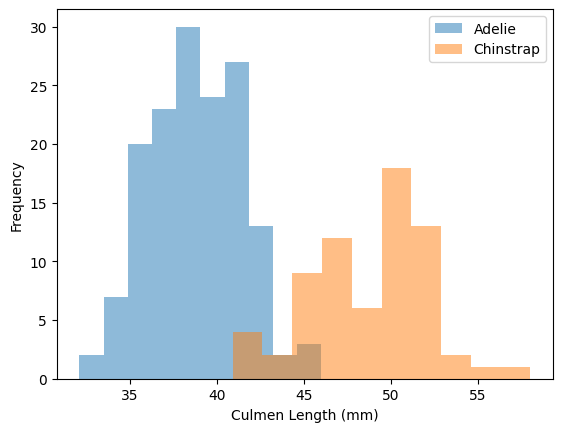

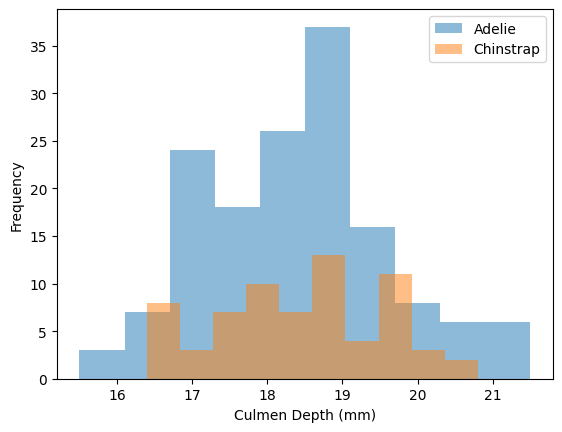

In [7]:
df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins_classification.csv"


peng_df = pd.read_csv(df_path)


# Keeping Adelie and Chinstrap classes
peng_df = (
     peng_df.loc[(peng_df["Species"] == "Adelie") | (peng_df["Species"] == "Chinstrap")]
          )

# data and target
culmen_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)']
target_column = "Species"



for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    peng_df.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

In [8]:
from sklearn.model_selection import train_test_split


data_train, data_test, target_train, target_test = train_test_split(peng_df[culmen_columns], 
                                                                    peng_df[target_column], 
                                                                    test_size=0.2, 
                                                                    random_state=123)

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


logistic_regression = make_pipeline(
                            StandardScaler(),
                            LogisticRegression()
                                    )

logistic_regression.fit(data_train, target_train)

accuracy = logistic_regression.score(data_test, target_test)

print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.909


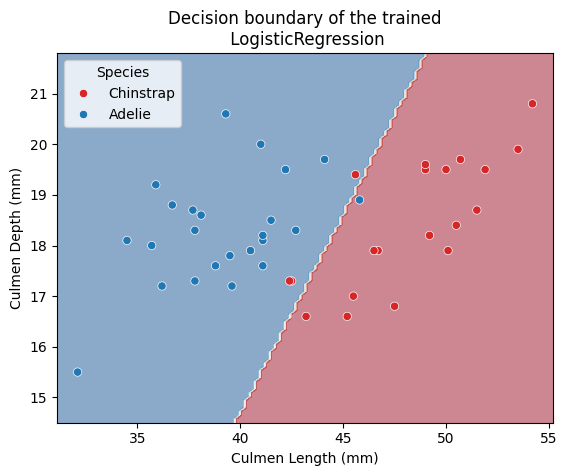

In [10]:
# Displaying the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=data_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_test,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [11]:
coefs = logistic_regression[-1].coef_[0]

weights = pd.Series(coefs, index=[f"Weight for '{c}'" for c in culmen_columns])

weights

Weight for 'Culmen Length (mm)'    3.843803
Weight for 'Culmen Depth (mm)'    -1.089471
dtype: float64

You can [access pipeline
steps](https://scikit-learn.org/stable/modules/compose.html#access-pipeline-steps)
by name or position. In the code above `logistic_regression[-1]` means the
last step of the pipeline. Then you can access the attributes of that step such
as `coef_`. Notice also that the `coef_` attribute is an array of shape (1,
`n_features`) an then we access it via its first entry. Alternatively one
could use `coef_.ravel()`.

We are now ready to visualize the weight values as a barplot:

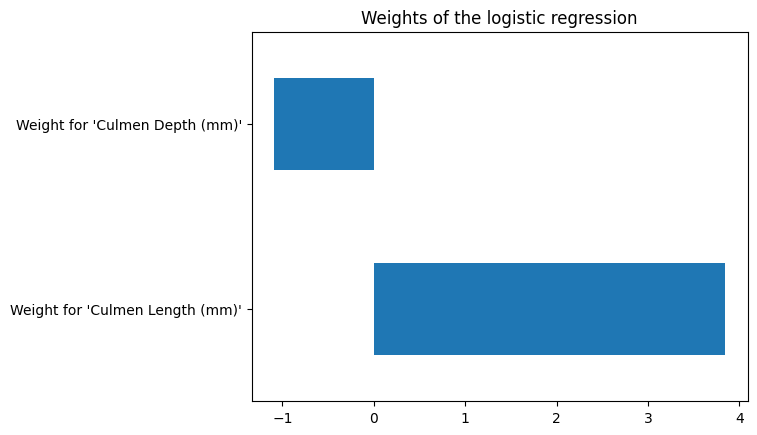

In [12]:
weights.plot.barh()

_ = plt.title("Weights of the logistic regression")

In [13]:
# Estimating Probabilities

y_pred_proba = logistic_regression.predict_proba(data_test)


y_pred_proba

array([[6.42654566e-01, 3.57345434e-01],
       [4.37900843e-02, 9.56209916e-01],
       [9.60073681e-01, 3.99263193e-02],
       [9.92639013e-01, 7.36098670e-03],
       [3.30957237e-02, 9.66904276e-01],
       [3.66475899e-01, 6.33524101e-01],
       [9.09792438e-01, 9.02075616e-02],
       [9.83796053e-01, 1.62039468e-02],
       [9.93233834e-01, 6.76616600e-03],
       [9.15964375e-01, 8.40356249e-02],
       [1.59723012e-02, 9.84027699e-01],
       [9.92201138e-01, 7.79886210e-03],
       [6.58860317e-01, 3.41139683e-01],
       [1.13783832e-01, 8.86216168e-01],
       [9.94934161e-01, 5.06583859e-03],
       [1.21995556e-01, 8.78004444e-01],
       [9.98291879e-01, 1.70812138e-03],
       [9.97697362e-01, 2.30263812e-03],
       [3.12960497e-02, 9.68703950e-01],
       [9.99105096e-01, 8.94903817e-04],
       [1.38868651e-01, 8.61131349e-01],
       [4.21914687e-01, 5.78085313e-01],
       [5.69872033e-01, 4.30127967e-01],
       [1.59794278e-02, 9.84020572e-01],
       [9.971649

More in general, the output of `predict_proba` is an array of shape
(`n_samples`, `n_classes`)

In [14]:
y_pred_proba.shape

(44, 2)

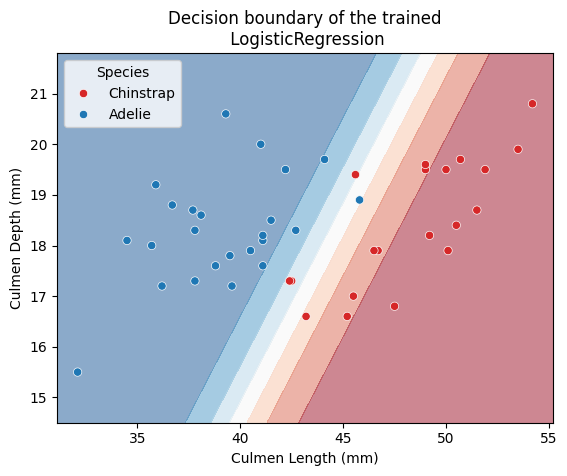

In [15]:
# Displaying the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict_proba",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=data_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_test,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

For multi-class classification the logistic regression uses the [softmax
function](https://en.wikipedia.org/wiki/Softmax_function) to make predictions.

## Non-Linear Feature Engineering for Linear Regression


A machine learning pipeline that combines a non-linear feature engineering
step followed by a linear regression step can therefore be considered a
non-linear regression model as a whole.

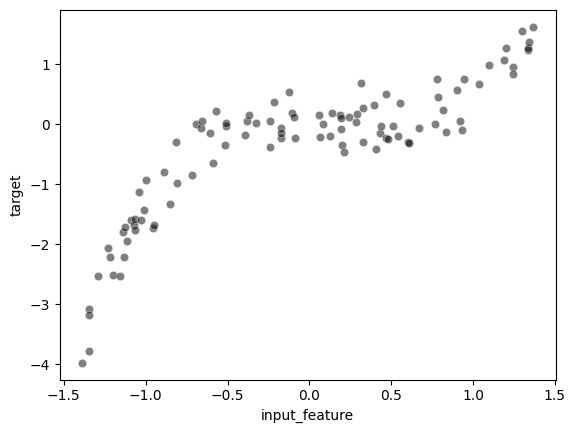

In [16]:
rng = np.random.RandomState(0)

n_sample = 100

data_max, data_min = 1.4, -1.4

len_data = data_max - data_min

# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * 0.3
target = data**3 - 0.5 * data**2 + noise

# Plotting
full_data = pd.DataFrame({"input_feature": data, "target": target})

import seaborn as sns

_ = sns.scatterplot(
    data=full_data, x="input_feature", y="target", color="black", alpha=0.5
)

In [17]:
data = data.reshape((-1, 1))

data.shape

(100, 1)

In [18]:
# Writing a helper function to fit, score and plot the different regression models


def fit_score_plot_regression(model, title=None):
    # Fit to the training data
    model.fit(data, target)
    # Perform your prediction
    target_predicted = model.predict(data)
    # Get your error metric
    mse = mean_squared_error(target, target_predicted)
    # Now lets plot
    ax = sns.scatterplot(
            data=full_data, x = "input_feature", y = "target",
            color = "black", alpha = 0.5
    )
    
    ax.plot(data, target_predicted)
    if title is not None:
        _ = ax.set_title(title + f" (MSE = {mse:.2f})")
    else:
        _ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


linear_regression = LinearRegression()

linear_regression

LinearRegression()

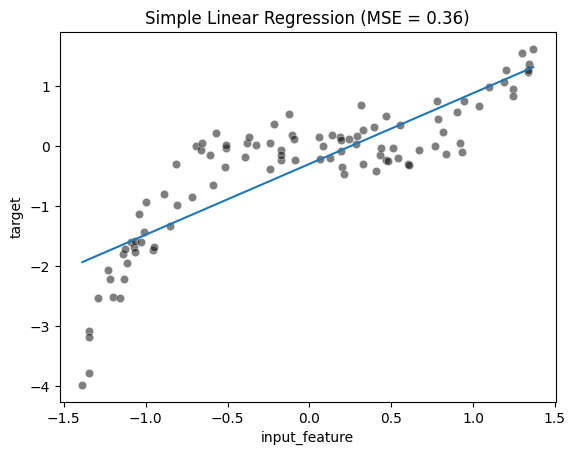

In [20]:
fit_score_plot_regression(model=linear_regression, title="Simple Linear Regression")

In [21]:
print(
    f"weight: {linear_regression.coef_[0]:.2f}, "
    f"intercept: {linear_regression.intercept_:.2f}"
)

weight: 1.18, intercept: -0.29


Notice that the learnt model cannot handle the non-linear relationship between
`data` and `target` because linear models assume a linear relationship.
Indeed, there are 3 possibilities to solve this issue:

1. choose a model that can natively deal with non-linearity,
2. engineer a richer set of features by including expert knowledge which can
   be directly used by a simple linear model, or
3. use a "kernel" to have a locally-based decision function instead of a
   global linear decision function.

Let's illustrate quickly the first point by using a decision tree regressor
which can natively handle non-linearity.

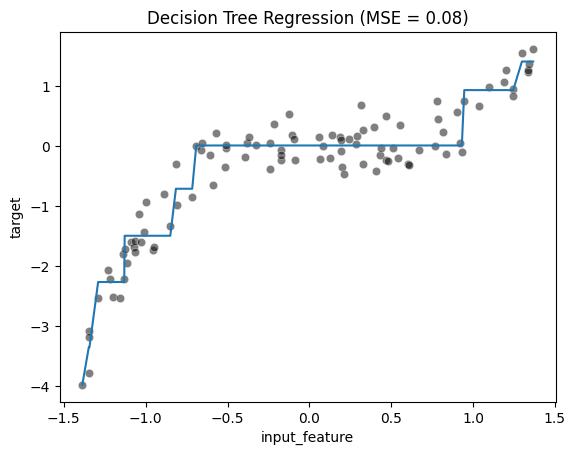

In [22]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(max_depth=3)


fit_score_plot_regression(model=tree, title="Decision Tree Regression")

Instead of having a model which can natively deal with non-linearity, we could
also modify our data: we could create new features, derived from the original
features, using some expert knowledge. In this example, we know that we have a
cubic and squared relationship between `data` and `target` (because we
generated the data).

Indeed, we could create two new features (`data ** 2` and `data ** 3`) using
this information as follows. This kind of transformation is called a
polynomial feature expansion:

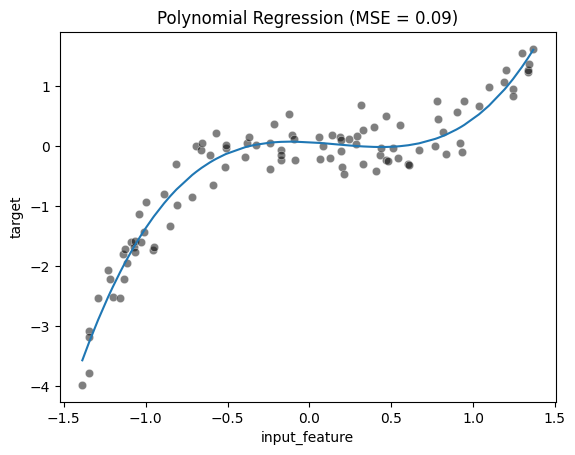

In [23]:
from sklearn.preprocessing import PolynomialFeatures


polynomial_expansion = PolynomialFeatures(degree=3, include_bias=False)


polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression(),
)


fit_score_plot_regression(model=polynomial_regression, title="Polynomial Regression")

In [24]:
# Using the Kernel method

from sklearn.svm import SVR

svr = SVR(kernel="linear")

svr

SVR(kernel='linear')

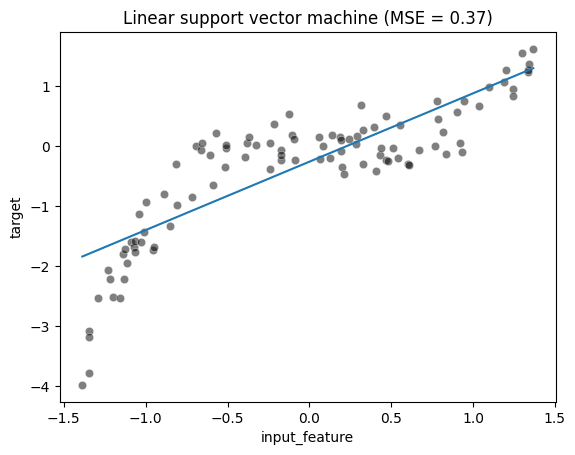

In [25]:
fit_score_plot_regression(svr, title="Linear support vector machine")

The predictions of our SVR with a linear kernel are all aligned on a straight
line. `SVR(kernel="linear")` is indeed yet another example of a linear model.

The estimator can also be configured to use a non-linear kernel. Then, it can
learn a prediction function that computes non-linear relations between samples
for which we want to make a prediction and selected samples from the training
set.

The result is another kind of non-linear regression model with a similar
expressivity as our previous polynomial regression pipeline:

In [26]:
svr = SVR(kernel="poly", degree=3)
svr

SVR(kernel='poly')

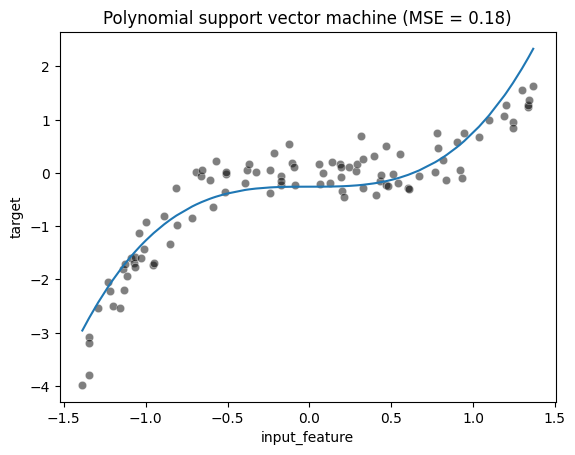

In [27]:
fit_score_plot_regression(svr, title="Polynomial support vector machine")

Kernel methods such as SVR are very efficient for small to medium datasets.

For larger datasets with `n_samples >> 10_000`, it is often computationally
more efficient to perform explicit feature expansion using
`PolynomialFeatures` or other non-linear transformers from scikit-learn such
as
[KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)
or
[SplineTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.SplineTransformer.html).

Here again we refer the interested reader to the documentation to get a proper
definition of those methods. The following just gives an intuitive overview of
the predictions we would get using those on our toy dataset:

In [28]:
from sklearn.preprocessing import KBinsDiscretizer


binned_regression = make_pipeline(
                        KBinsDiscretizer(n_bins=8),
                        LinearRegression(),
                                 )


binned_regression

Pipeline(steps=[('kbinsdiscretizer', KBinsDiscretizer(n_bins=8)),
                ('linearregression', LinearRegression())])

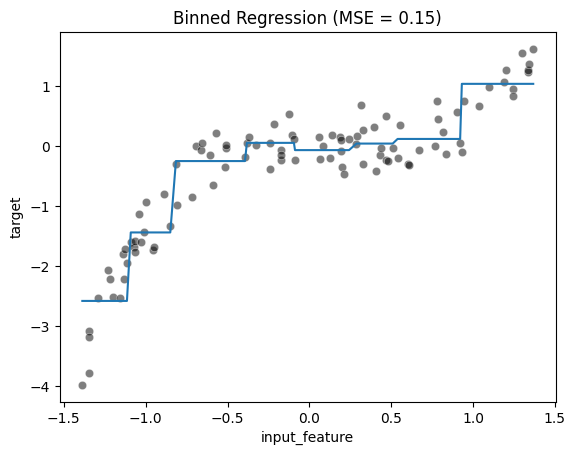

In [29]:
fit_score_plot_regression(model=binned_regression, title="Binned Regression")

In [30]:
from sklearn.preprocessing import SplineTransformer

spline_regression = make_pipeline(
    SplineTransformer(degree=3, include_bias=False),
    LinearRegression(),
)
spline_regression

Pipeline(steps=[('splinetransformer', SplineTransformer(include_bias=False)),
                ('linearregression', LinearRegression())])

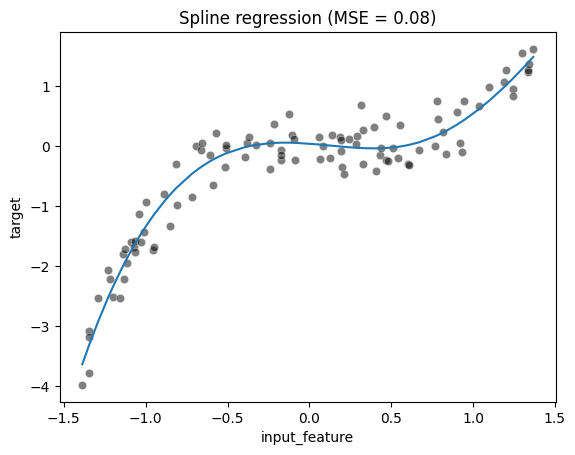

In [31]:
fit_score_plot_regression(spline_regression, title="Spline regression")

`Nystroem` is a nice alternative to `PolynomialFeatures` that makes it
possible to keep the memory usage of the transformed dataset under control.
However, interpreting the meaning of the intermediate features can be
challenging.

In [32]:
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(kernel="poly", degree=3, n_components=5, random_state=0),
    LinearRegression(),
)
nystroem_regression

Pipeline(steps=[('nystroem',
                 Nystroem(degree=3, kernel='poly', n_components=5,
                          random_state=0)),
                ('linearregression', LinearRegression())])

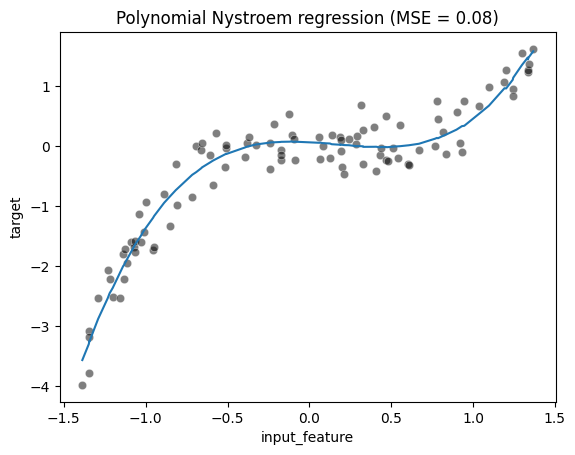

In [33]:
fit_score_plot_regression(
    nystroem_regression, title="Polynomial Nystroem regression"
)

# Feature Engineering 

In [34]:
df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins.csv"


penguins_df = pd.read_csv(df_path)


columns = ["Flipper Length (mm)", "Culmen Length (mm)", "Culmen Depth (mm)"]


target_name = "Body Mass (g)"

penguins_df.describe()

Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     344.000000          342.000000         342.000000   
mean       63.151163           43.921930          17.151170   
std        40.430199            5.459584           1.974793   
min         1.000000           32.100000          13.100000   
25%        29.000000           39.225000          15.600000   
50%        58.000000           44.450000          17.300000   
75%        95.250000           48.500000          18.700000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           342.000000     342.000000         330.000000   
mean            200.915205    4201.754386           8.733382   
std              14.061714     801.954536           0.551770   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.299890   
50%             197.000000    4050.000000           8.652405   
75%             213.000000    4750.000000           9.172123   
max             231.000000    6300.000000          10.025440   

       Delta 13 C (o/oo)  
count         331.000000  
mean          -25.686292  
std             0.793961  
min           -27.018540  
25%           -26.320305  
50%           -25.833520  
75%           -25.062050  
max           -23.787670

In [35]:
# Remove missing values

penguins_df = penguins_df[columns + [target_name]].dropna()


# Features and Target
data = penguins_df[columns]
target = penguins_df[target_name]


data.describe()

Flipper Length (mm)  Culmen Length (mm)  Culmen Depth (mm)
count           342.000000          342.000000         342.000000
mean            200.915205           43.921930          17.151170
std              14.061714            5.459584           1.974793
min             172.000000           32.100000          13.100000
25%             190.000000           39.225000          15.600000
50%             197.000000           44.450000          17.300000
75%             213.000000           48.500000          18.700000
max             231.000000           59.600000          21.500000

In [36]:
from sklearn.model_selection import cross_validate

# Creating a linear regression model

linear_regression = LinearRegression()

# Executing a 10-fold cross-validation 

cv_results = cross_validate(
                    estimator=linear_regression,
                    X = data,
                    y = target,
                    scoring = "neg_mean_absolute_error",
                    cv = 10,
) 


cv_results = pd.DataFrame(cv_results)

print(f"Mean of MAE in grams --> {cv_results['test_score'].mean() * (-1):.3f}")
print(f"Std dev of MAE in grams --> {cv_results['test_score'].std():.3f}")

Mean of MAE in grams --> 337.071
Std dev of MAE in grams --> 89.459


In [37]:
plynomial_reg = make_pipeline(
                    PolynomialFeatures(degree=2, 
                                       interaction_only=True, 
                                       include_bias=False),
                    LinearRegression()
                             ).set_output(transform="pandas") 



In [38]:
# Understanding the transformation
plynomial_reg[0].fit_transform(data.loc[0:4])

Flipper Length (mm)  Culmen Length (mm)  Culmen Depth (mm)  \
0                181.0                39.1               18.7   
1                186.0                39.5               17.4   
2                195.0                40.3               18.0   
4                193.0                36.7               19.3   

   Flipper Length (mm) Culmen Length (mm)  \
0                                  7077.1   
1                                  7347.0   
2                                  7858.5   
4                                  7083.1   

   Flipper Length (mm) Culmen Depth (mm)  Culmen Length (mm) Culmen Depth (mm)  
0                                 3384.7                                731.17  
1                                 3236.4                                687.30  
2                                 3510.0                                725.40  
4                                 3724.9                                708.31

In [39]:
# Executing a 10-fold cross-validation 

cv_results = cross_validate(
                    estimator=plynomial_reg,
                    X = data,
                    y = target,
                    scoring = "neg_mean_absolute_error",
                    cv = 10
) 


cv_results = pd.DataFrame(cv_results)

print(f"Mean of MAE in grams --> {cv_results['test_score'].mean() * (-1):.3f}")
print(f"Std dev of MAE in grams --> {cv_results['test_score'].std():.3f}")

Mean of MAE in grams --> 301.790
Std dev of MAE in grams --> 46.738


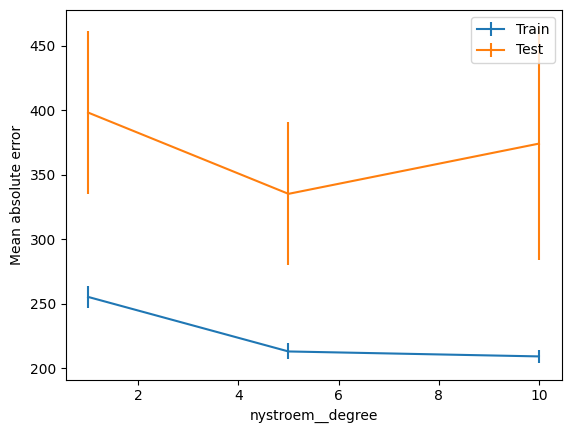

In [40]:
# Using Nystroem
from sklearn.model_selection import ValidationCurveDisplay, validation_curve

nystroem_regression = make_pipeline(
    Nystroem(kernel="poly", random_state=0),
    LinearRegression(),
)


# Optimizing Hyperparameter Degree
param_name = "nystroem__degree"
param_range = np.array([1, 5, 10])


display = ValidationCurveDisplay.from_estimator(
                                    nystroem_regression,
                                    data,
                                    target,
                                    param_name=param_name,
                                    param_range=param_range,
                                    cv = 10,
                                    scoring="neg_mean_absolute_error",
                                    negate_score=True,
                                    std_display_style="errorbar"
                                )


# display.plot()

> Choice is either 4 or 5

In [41]:
# nystroem_regression.get_params()

In [42]:
# Using degree to be 1

nystroem_regression = make_pipeline(
    Nystroem(kernel="poly", degree=4,random_state=0),
    LinearRegression(),
)



cv_results = cross_validate(
                    estimator=nystroem_regression,
                    X = data,
                    y = target,
                    scoring = "neg_root_mean_squared_error",
                    cv = 10
) 


cv_results = pd.DataFrame(cv_results)

print(f"Mean of MAE in grams --> {cv_results['test_score'].mean() * (-1):.3f}")
print(f"Std dev of MAE in grams --> {cv_results['test_score'].std():.3f}")

Mean of MAE in grams --> 455.999
Std dev of MAE in grams --> 94.209


## Non-Linear Feature Engineering for Logistic Regression

In [43]:
# Dataset 1

from sklearn.datasets import make_moons


feature_names = ["Feature #0", "Feature #1"]
target_name = "class"


X, y = make_moons(n_samples=100, noise=0.13, random_state=42)


moons = pd.DataFrame(
                np.concatenate([X, y[:, np.newaxis]], axis = 1),
                columns=feature_names + [target_name]
                    )


data_moons, target_moons = moons[feature_names], moons[target_name]



In [44]:
# Dataset 2

from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(
    n_samples=100, n_features=2, n_classes=2, random_state=42
)
gauss = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name],
)
data_gauss, target_gauss = gauss[feature_names], gauss[target_name]

In [45]:
# Dataset 3

xor = pd.DataFrame(
    np.random.RandomState(0).uniform(low=-1, high=1, size=(200, 2)),
    columns=feature_names,
)


target_xor = np.logical_xor(xor["Feature #0"] > 0, xor["Feature #1"] > 0)
target_xor = target_xor.astype(np.int32)


xor["class"] = target_xor

data_xor = xor[feature_names]

[Text(0.5, 1.0, 'The XOR dataset'), Text(0.5, 0, 'Feature #0')]

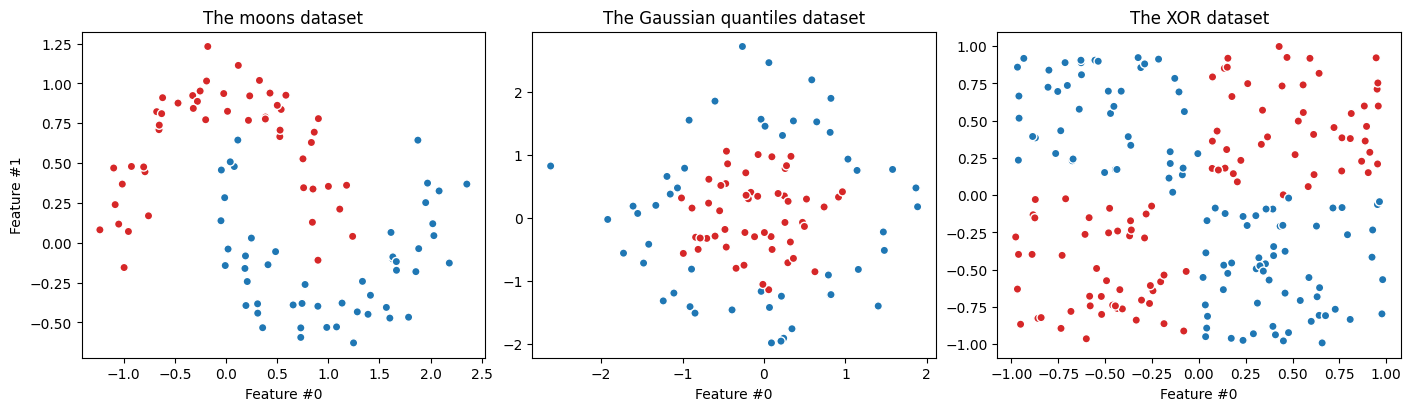

In [46]:
from matplotlib.colors import ListedColormap


_, axs = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

common_scatter_plot_params = dict(
    cmap=ListedColormap(["tab:red", "tab:blue"]),
    edgecolor="white",
    linewidth=1,
)

axs[0].scatter(
    data_moons[feature_names[0]],
    data_moons[feature_names[1]],
    c=target_moons,
    **common_scatter_plot_params,
)
axs[1].scatter(
    data_gauss[feature_names[0]],
    data_gauss[feature_names[1]],
    c=target_gauss,
    **common_scatter_plot_params,
)
axs[2].scatter(
    data_xor[feature_names[0]],
    data_xor[feature_names[1]],
    c=target_xor,
    **common_scatter_plot_params,
)
axs[0].set(
    title="The moons dataset",
    xlabel=feature_names[0],
    ylabel=feature_names[1],
)
axs[1].set(
    title="The Gaussian quantiles dataset",
    xlabel=feature_names[0],
)
axs[2].set(
    title="The XOR dataset",
    xlabel=feature_names[0],
)

In [47]:
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary(model, title=None):
    datasets = [
        (data_moons, target_moons),
        (data_gauss, target_gauss),
        (data_xor, target_xor),
    ]
    fig, axs = plt.subplots(
        ncols=3,
        figsize=(14, 4),
        constrained_layout=True,
    )

    for i, ax, (data, target) in zip(
        range(len(datasets)),
        axs,
        datasets,
    ):
        model.fit(data, target)
        DecisionBoundaryDisplay.from_estimator(
            model,
            data,
            response_method="predict_proba",
            plot_method="pcolormesh",
            cmap="RdBu",
            alpha=0.8,
            # Setting vmin and vmax to the extreme values of the probability to
            # ensure that 0.5 is mapped to white (the middle) of the blue-red
            # colormap.
            vmin=0,
            vmax=1,
            ax=ax,
        )
        DecisionBoundaryDisplay.from_estimator(
            model,
            data,
            response_method="predict_proba",
            plot_method="contour",
            alpha=0.8,
            levels=[0.5],  # 0.5 probability contour line
            linestyles="--",
            linewidths=2,
            ax=ax,
        )
        ax.scatter(
            data[feature_names[0]],
            data[feature_names[1]],
            c=target,
            **common_scatter_plot_params,
        )
        if i > 0:
            ax.set_ylabel(None)
    if title is not None:
        fig.suptitle(title)

In [48]:
# Building the logistic regression model

logistic_regression = make_pipeline(
                            StandardScaler(), 
                            LogisticRegression()
                                   )

logistic_regression

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

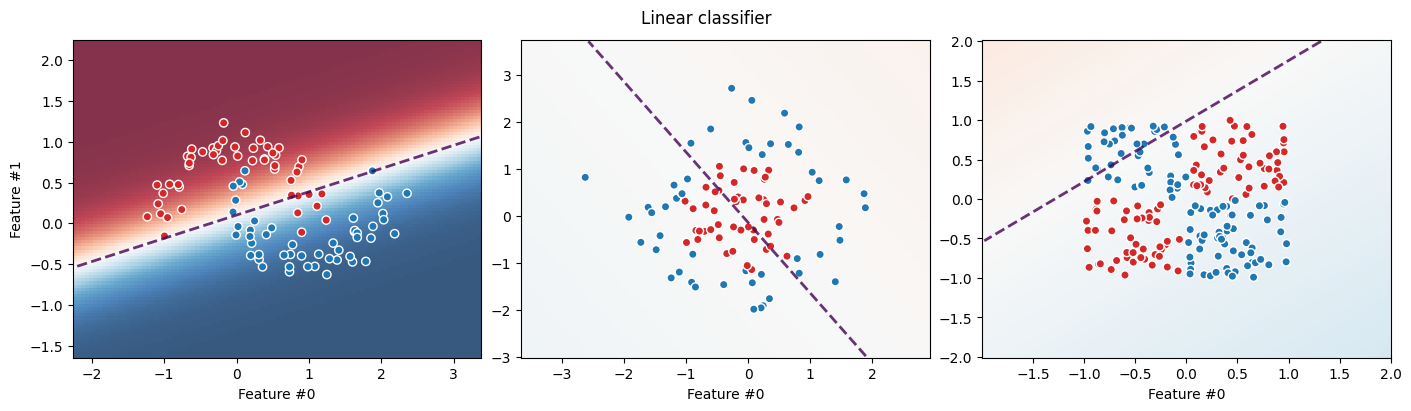

In [49]:
plot_decision_boundary(logistic_regression, title="Linear classifier")

This confirms that it is not possible to separate the two classes with a
linear model. On each plot we see a **significant number of misclassified
samples on the training set**! The three plots show typical cases of
**underfitting** for linear models.

Also, the last two plots show soft colors, meaning that the model is highly
unsure about which class to choose.

## Engineering Non-Linear Features


In [50]:
classifier = make_pipeline(
                    KBinsDiscretizer(n_bins=5, encode="onehot-dense"),
                    LogisticRegression()
).set_output(transform="pandas")

classifier

Pipeline(steps=[('kbinsdiscretizer', KBinsDiscretizer(encode='onehot-dense')),
                ('logisticregression', LogisticRegression())])

In [51]:
classifier[0].fit_transform(data_moons)

Feature #0_0.0  Feature #0_1.0  Feature #0_2.0  Feature #0_3.0  \
0              0.0             0.0             0.0             0.0   
1              0.0             1.0             0.0             0.0   
2              0.0             0.0             1.0             0.0   
3              1.0             0.0             0.0             0.0   
4              1.0             0.0             0.0             0.0   
..             ...             ...             ...             ...   
95             0.0             1.0             0.0             0.0   
96             0.0             0.0             0.0             1.0   
97             0.0             0.0             1.0             0.0   
98             0.0             0.0             0.0             0.0   
99             0.0             1.0             0.0             0.0   

    Feature #0_4.0  Feature #1_0.0  Feature #1_1.0  Feature #1_2.0  \
0              1.0             1.0             0.0             0.0   
1              0.0             0.0             0.0             0.0   
2              0.0             1.0             0.0             0.0   
3              0.0             0.0             0.0             1.0   
4              0.0             0.0             0.0             1.0   
..             ...             ...             ...             ...   
95             0.0             0.0             1.0             0.0   
96             0.0             1.0             0.0             0.0   
97             0.0             0.0             0.0             0.0   
98             1.0             0.0             1.0             0.0   
99             0.0             0.0             0.0             0.0   

    Feature #1_3.0  Feature #1_4.0  
0              0.0             0.0  
1              1.0             0.0  
2              0.0             0.0  
3              0.0             0.0  
4              0.0             0.0  
..             ...             ...  
95             0.0             0.0  
96             0.0             0.0  
97             1.0             0.0  
98             0.0             0.0  
99             1.0             0.0  

[100 rows x 10 columns]

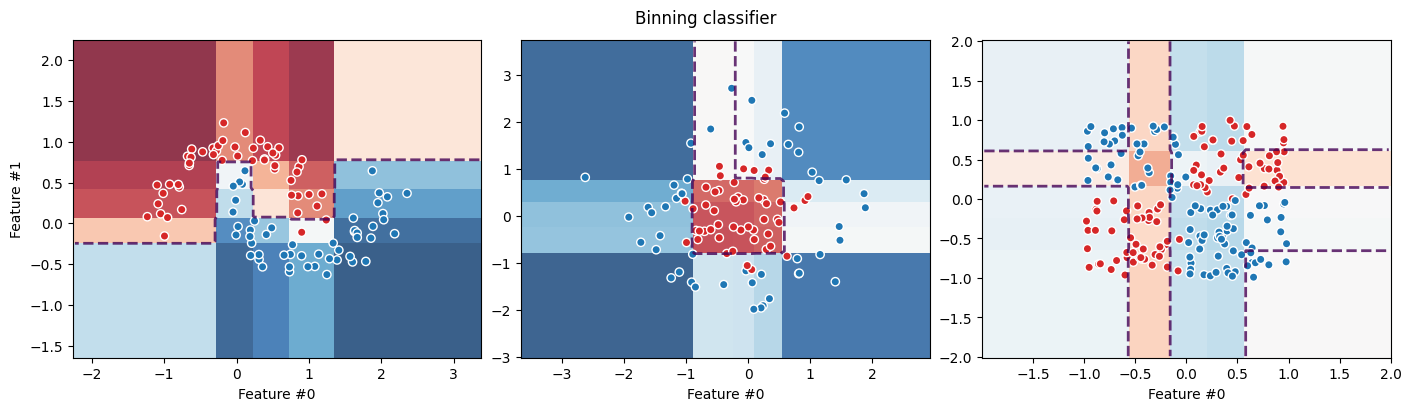

In [52]:
plot_decision_boundary(classifier, title="Binning classifier")

We can see that the resulting decision boundary is constrained to follow
**axis-aligned segments**, which is very similar to what a decision tree would
le.

This axis-aligned decision boundary is not necessarily the natural decision
boundary a human would have intuitively drawn for the moons dataset and the
Gaussian quantiles datasets. It still makes it possible for the model to
successfully separate the data. However, binning alone does not help the
classifier separate the data for the XOR dataset. This is because **the
binning transformation is a feature-wise transformation** and thus **cannot
capture interactions** between features that are necessary to separate the
XOR dataset.

Let's now consider a **spline** transformation of the original features. This
transformation can be considered a **smooth version of the binning
transformation**. You can find more details in the [scikit-learn user guide](
https://scikit-learn.org/stable/modules/preprocessing.html#spline-transformer).

In [53]:
from sklearn.preprocessing import SplineTransformer

classifier = make_pipeline(
    SplineTransformer(degree=3, n_knots=5),
    LogisticRegression(),
)
classifier

Pipeline(steps=[('splinetransformer', SplineTransformer()),
                ('logisticregression', LogisticRegression())])

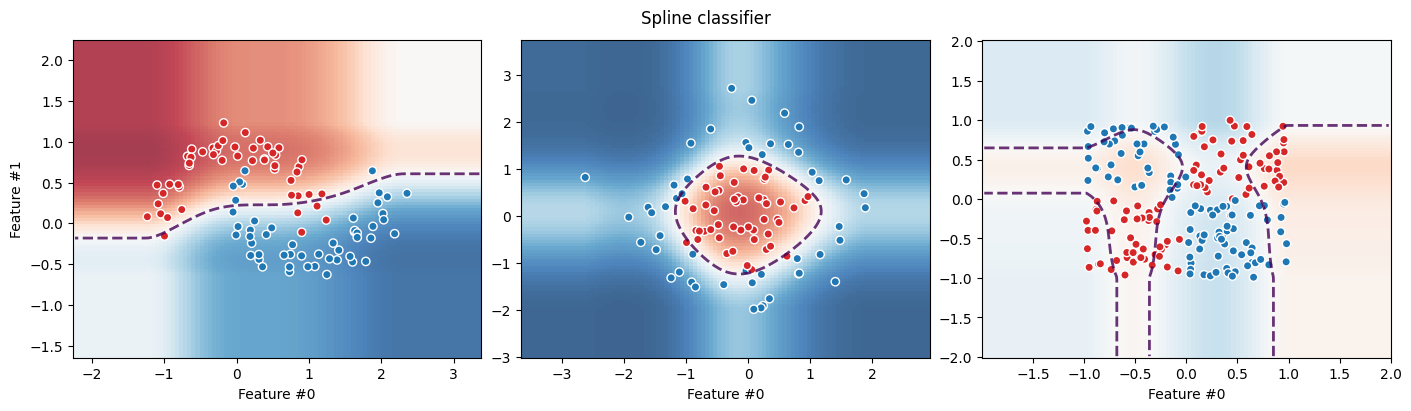

In [54]:
plot_decision_boundary(classifier, title="Spline classifier")


We can see that the decision boundary is now smooth, and while it favors
axis-aligned decision rules when extrapolating in low density regions, it can
adopt a more curvy decision boundary in the high density regions.
However, as for the binning transformation, the model still fails to separate
the data for the XOR dataset, irrespective of the number of knots, for the
same reasons: **the spline transformation is a feature-wise transformation**
and thus **cannot capture interactions** between features.

Take into account that the number of knots is a hyperparameter that needs to be
tuned. If we use too few knots, the model would underfit the data, as shown on
the moons dataset. If we use too many knots, the model would overfit the data.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Notice that <tt class="docutils literal"><span class="pre">KBinsDiscretizer(encode="onehot")</span></tt> and <tt class="docutils literal">SplineTransformer</tt> do not
require additional scaling. Indeed, they can replace the scaling step for
numerical features: they both create features with values in the [0, 1] range.</p>
</div>

## Modeling non-additive feature interactions




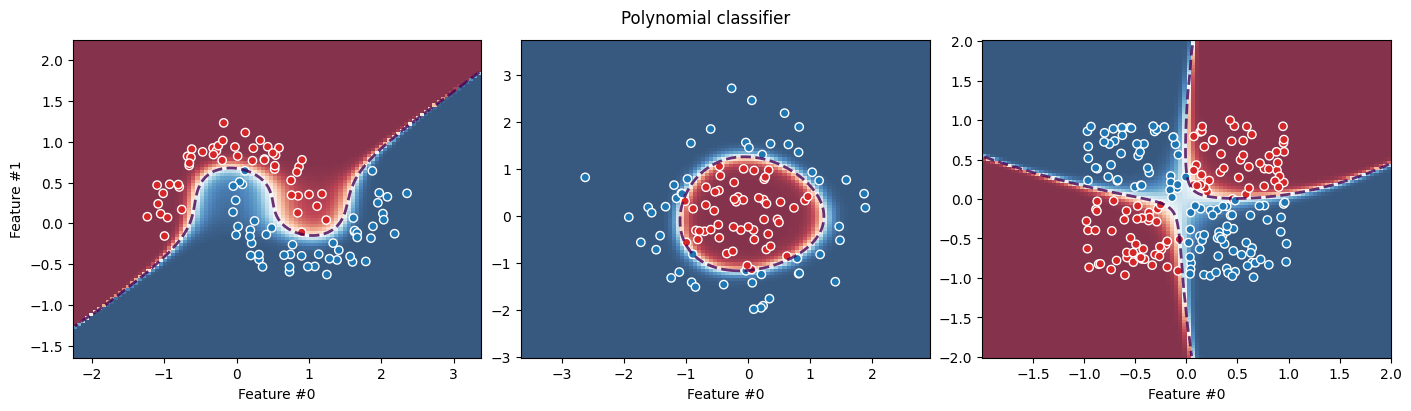

In [55]:
classifier = make_pipeline(
                StandardScaler(),
                PolynomialFeatures(degree=3, include_bias=False),
                LogisticRegression(C=10)
                          )

plot_decision_boundary(classifier, title="Polynomial classifier")


We can see that the decision boundary of this polynomial classifier is
**smooth** and can successfully separate the data on all three datasets
(depending on how we set the values of the `degree` and `C`
hyperparameters).

It is interesting to observe that this models extrapolates very differently
from the previous models: its decision boundary can take a diagonal
direction. Furthermore, we can observe that predictions are very confident in
the low density regions of the feature space, even very close to the decision
boundary

We can obtain very similar results by using a kernel approximation technique
such as the Nyström method with a polynomial kernel:

In [56]:
classifier = make_pipeline(
                    StandardScaler(),
                    Nystroem(kernel="poly", degree=3, coef0=1, n_components=100),
                    LogisticRegression(C=10)
)


classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('nystroem', Nystroem(coef0=1, degree=3, kernel='poly')),
                ('logisticregression', LogisticRegression(C=10))])

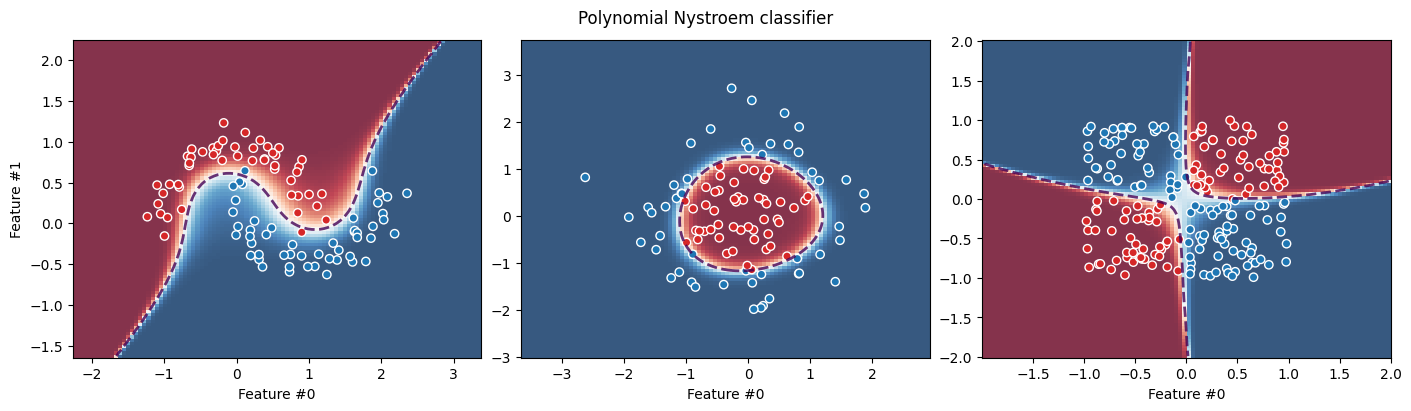

In [57]:
plot_decision_boundary(classifier, title="Polynomial Nystroem classifier")


The polynomial kernel approach would be interesting in cases were the
original feature space is already of high dimension: in these cases,
**computing the complete polynomial expansion** with `PolynomialFeatures`
could be **intractable**, while Nyström method can control the output
dimensionality with the `n_components` parameter.

Let's now explore the use of a radial basis function (RBF) kernel:

In [58]:
classifier = make_pipeline(
                StandardScaler(),
                Nystroem(kernel="rbf", gamma=1, n_components=100),
                LogisticRegression(C=5)
)


classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('nystroem', Nystroem(gamma=1)),
                ('logisticregression', LogisticRegression(C=5))])

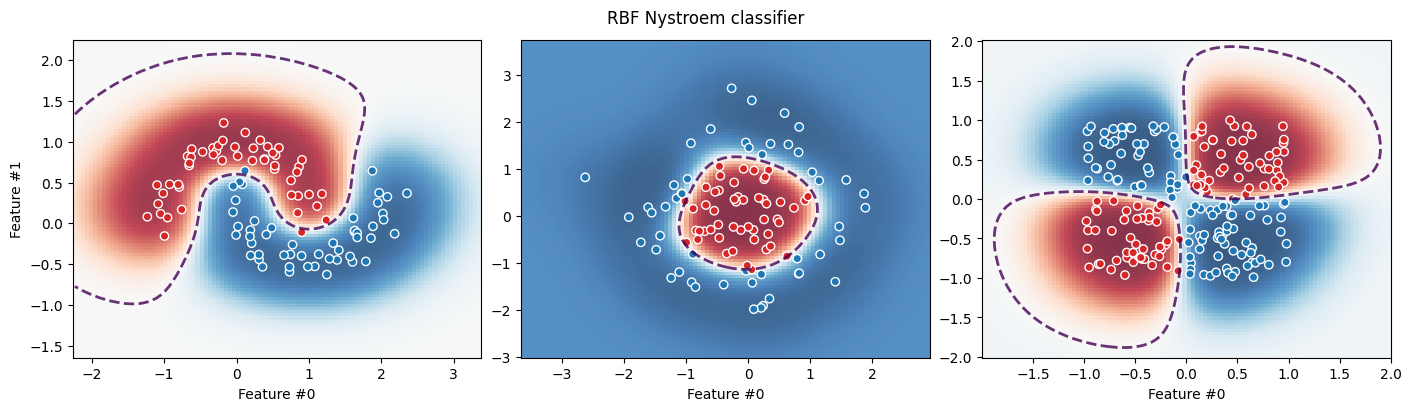

In [59]:
plot_decision_boundary(classifier, title="RBF Nystroem classifier")

## Multi-step Feature Engineering


It is possible to combine several feature engineering transformers in a
single pipeline to blend their respective inductive biases. For instance, we
can combine the binning transformation with a kernel approximation:

In [60]:
classifier = make_pipeline(
                KBinsDiscretizer(n_bins=5),
                Nystroem(kernel="rbf", gamma=1.0, n_components=100),
                LogisticRegression()
                          )

classifier

Pipeline(steps=[('kbinsdiscretizer', KBinsDiscretizer()),
                ('nystroem', Nystroem(gamma=1.0)),
                ('logisticregression', LogisticRegression())])

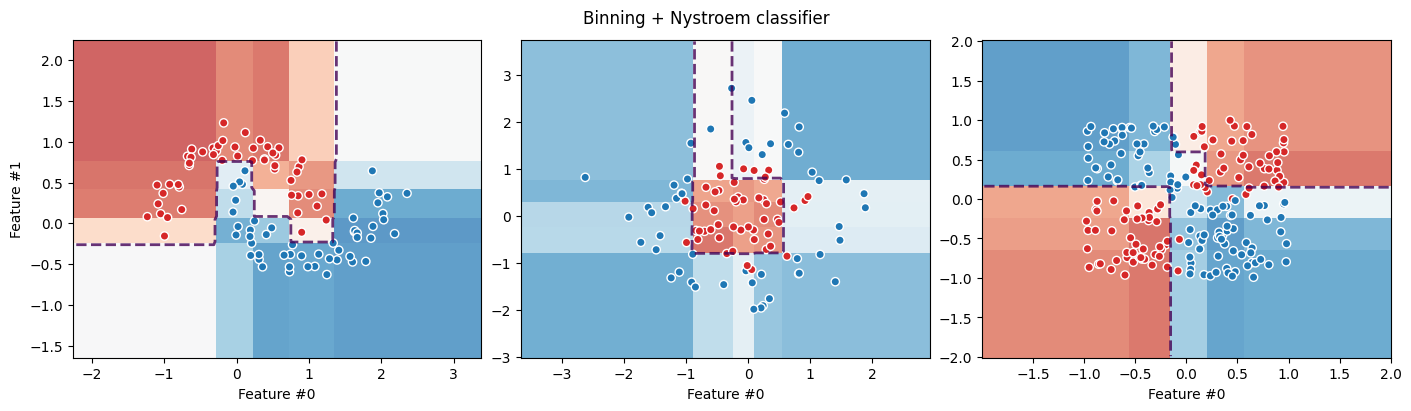

In [61]:
plot_decision_boundary(classifier, title="Binning + Nystroem classifier")


It is interesting to observe that this model is still piecewise constant with
axis-aligned decision boundaries everywhere, but it can now successfully deal
with the XOR problem thanks to the second step of the pipeline that can
model the interactions between the features transformed by the first step.

We can also combine the spline transformation with a kernel approximation:

In [62]:
classifier = make_pipeline(
    SplineTransformer(n_knots=5),
    Nystroem(kernel="rbf", gamma=1.0, n_components=100),
    LogisticRegression(),
)
classifier

Pipeline(steps=[('splinetransformer', SplineTransformer()),
                ('nystroem', Nystroem(gamma=1.0)),
                ('logisticregression', LogisticRegression())])

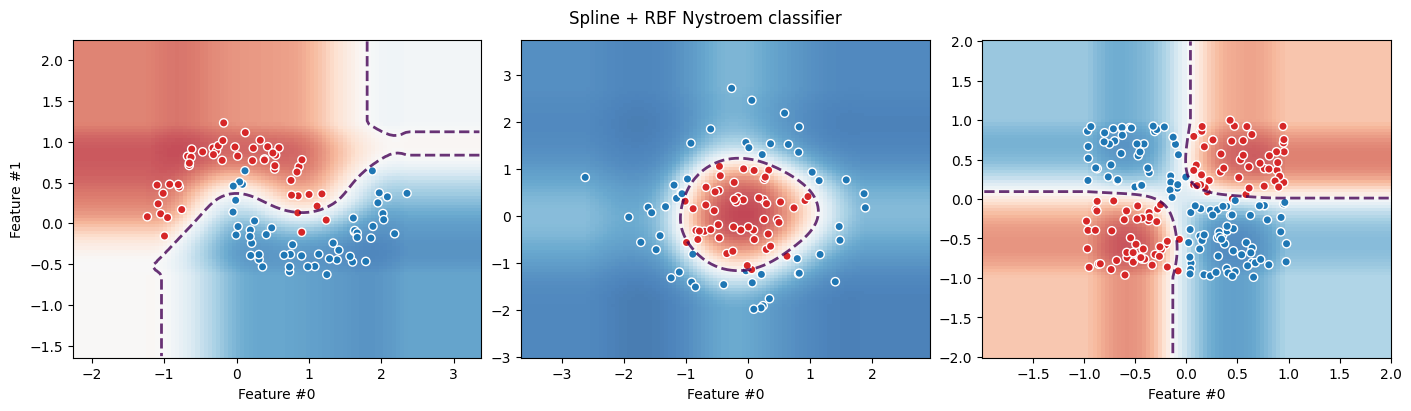

In [63]:
plot_decision_boundary(classifier, title="Spline + RBF Nystroem classifier")


## Summary and take-away messages

- Linear models such as logistic regression can be used for classification on
  non-linearly separable datasets by leveraging non-linear feature
  engineering.
- Transformers such as `KBinsDiscretizer` and `SplineTransformer` can be used
  to engineer non-linear features independently for each original feature.
- As a result, these transformers cannot capture interactions between the
  orignal features (and then would fail on the XOR classification task).
- Despite this limitation they already augment the expressivity of the
  pipeline, which can be sufficient for some datasets.
- They also favor axis-aligned decision boundaries, in particular in the low
  density regions of the feature space (axis-aligned extrapolation).
- Transformers such as `PolynomialFeatures` and `Nystroem` can be used to
  engineer non-linear features that capture interactions between the original
  features.
- It can be useful to combine several feature engineering transformers in a
  single pipeline to build a more expressive model, for instance to favor
  axis-aligned extrapolation while also capturing interactions.
- In particular, if the original dataset has both numerical and categorical
  features, it can be useful to apply binning or a spline transformation to the
  numerical features and one-hot encoding to the categorical features. Then,
  the resulting features can be combined with a kernel approximation to model
  interactions between numerical and categorical features. This can be
  achieved with the help of `ColumnTransformer`.

In subsequent notebooks and exercises, we will further explore the interplay
between regularization, feature engineering, and the under-fitting /
overfitting trade-off.

But first we will do an exercise to illustrate the relationship between the
Nyström kernel approximation and support vector machines.

In [64]:


df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv"

adult_census = pd.read_csv(df_path)

target = adult_census["class"]

data = adult_census.select_dtypes(["integer", "floating"])

data = data.drop(columns=["education-num"])


data

age  capital-gain  capital-loss  hours-per-week
0       25             0             0              40
1       38             0             0              50
2       28             0             0              40
3       44          7688             0              40
4       18             0             0              30
...    ...           ...           ...             ...
48837   27             0             0              38
48838   40             0             0              40
48839   58             0             0              40
48840   22             0             0              20
48841   52         15024             0              40

[48842 rows x 4 columns]

In [65]:
# Building the classifier
classifier = make_pipeline(
                    StandardScaler(),
                    LogisticRegression(),
)


cv_results_num = cross_validate(
                    classifier,
                    data,
                    target,
                    return_estimator=True,
                    scoring="accuracy",
                    cv=10
)



print(f"Mean of MAE in grams --> {cv_results_num['test_score'].mean():.3f}")
print(f"Std dev of MAE in grams --> {cv_results_num['test_score'].std():.3f}")

Mean of MAE in grams --> 0.800
Std dev of MAE in grams --> 0.004


In [66]:
# Feature importance
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results_num["estimator"]]

coefs = pd.DataFrame(coefs, columns=data.columns)

coefs

age  capital-gain  capital-loss  hours-per-week
0  0.522043      2.466777      0.306030        0.539635
1  0.526067      2.406533      0.308178        0.541824
2  0.524257      2.455923      0.308124        0.543843
3  0.520375      2.450482      0.309170        0.534597
4  0.519259      2.512010      0.304243        0.546715
5  0.521732      2.441632      0.304017        0.541286
6  0.520235      2.473723      0.306893        0.536374
7  0.523958      2.445321      0.308326        0.538253
8  0.516454      2.405087      0.308394        0.535121
9  0.516737      2.450489      0.301394        0.535532

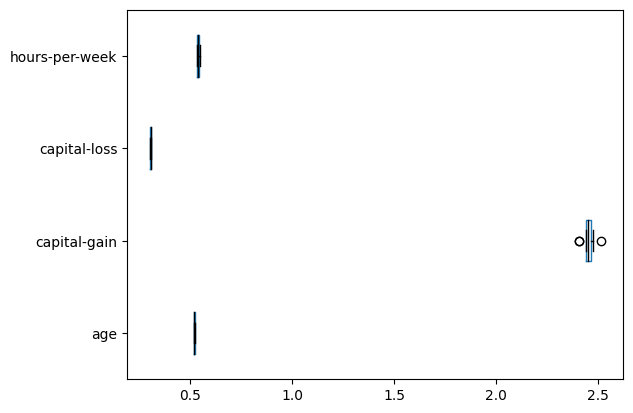

In [67]:
# Plotting feature importance
color = {"whiskers": "black", "medians": "black", "caps": "black"}
_, ax = plt.subplots()
_ = coefs.abs().plot.box(color=color, vert=False, ax=ax)

In [68]:
df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv"


adult_census = pd.read_csv(df_path)


target = adult_census["class"]


data = adult_census.drop(columns=["education-num", "class"])


data

age      workclass      education       marital-status  \
0       25        Private           11th        Never-married   
1       38        Private        HS-grad   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm   Married-civ-spouse   
3       44        Private   Some-college   Married-civ-spouse   
4       18              ?   Some-college        Never-married   
...    ...            ...            ...                  ...   
48837   27        Private     Assoc-acdm   Married-civ-spouse   
48838   40        Private        HS-grad   Married-civ-spouse   
48839   58        Private        HS-grad              Widowed   
48840   22        Private        HS-grad        Never-married   
48841   52   Self-emp-inc        HS-grad   Married-civ-spouse   

               occupation relationship    race      sex  capital-gain  \
0       Machine-op-inspct    Own-child   Black     Male             0   
1         Farming-fishing      Husband   White     Male             0   
2         Protective-serv      Husband   White     Male             0   
3       Machine-op-inspct      Husband   Black     Male          7688   
4                       ?    Own-child   White   Female             0   
...                   ...          ...     ...      ...           ...   
48837        Tech-support         Wife   White   Female             0   
48838   Machine-op-inspct      Husband   White     Male             0   
48839        Adm-clerical    Unmarried   White   Female             0   
48840        Adm-clerical    Own-child   White     Male             0   
48841     Exec-managerial         Wife   White   Female         15024   

       capital-loss  hours-per-week  native-country  
0                 0              40   United-States  
1                 0              50   United-States  
2                 0              40   United-States  
3                 0              40   United-States  
4                 0              30   United-States  
...             ...             ...             ...  
48837             0              38   United-States  
48838             0              40   United-States  
48839             0              40   United-States  
48840             0              20   United-States  
48841             0              40   United-States  

[48842 rows x 12 columns]

In [69]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


categorical_columns = selector(dtype_include=object)(data)
numerical_columns = selector(dtype_exclude=object)(data)


preprocessor = make_column_transformer(
                    (
                        OneHotEncoder(handle_unknown="ignore", min_frequency=0.01), categorical_columns,
                    ),
                    (
                        StandardScaler(), numerical_columns,
                    )
                                )

classifier = make_pipeline(preprocessor,
                           LogisticRegression(max_iter=5_000)
                          )


cv_results_num_cat = cross_validate(
                    classifier,
                    data,
                    target,
                    return_estimator=True,
                    scoring="accuracy",
                    cv=10
)



print(f"Mean of MAE in grams --> {cv_results_num_cat['test_score'].mean():.3f}")
print(f"Std dev of MAE in grams --> {cv_results_num_cat['test_score'].std():.3f}")

Mean of MAE in grams --> 0.851
Std dev of MAE in grams --> 0.003


In [70]:
(cv_results_num_cat['test_score'] > cv_results_num['test_score']).sum()

10

A model using both all features is better than a model using only numerical features for 10 CV iterations out of 10.


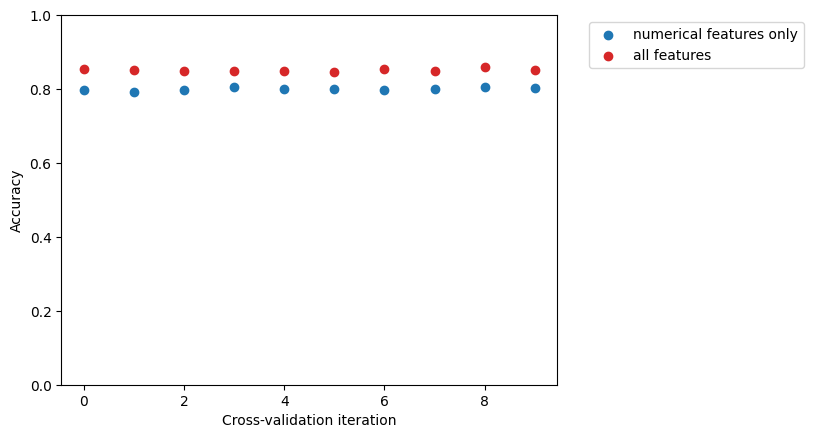

In [71]:
test_score_lr = cv_results_num['test_score']

test_score_complex_lr = cv_results_num_cat['test_score']


indices = np.arange(len(test_score_lr))
plt.scatter(
    indices, test_score_lr, color="tab:blue", label="numerical features only"
)
plt.scatter(
    indices,
    test_score_complex_lr,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using both all features is better than a"
    " model using only numerical features for"
    f" {sum(test_score_complex_lr > test_score_lr)} CV iterations out of 10."
)

In [72]:
preprocessor.fit(data)

feature_names = (
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(
        categorical_columns
                    )
                ).tolist()

feature_names += numerical_columns

feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_infrequent_sklearn',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Prof-school',
 'education_ Some-college',
 'education_infrequent_sklearn',
 'marital-status_ Divorced',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'marital-status_infrequent_sklearn',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Ma

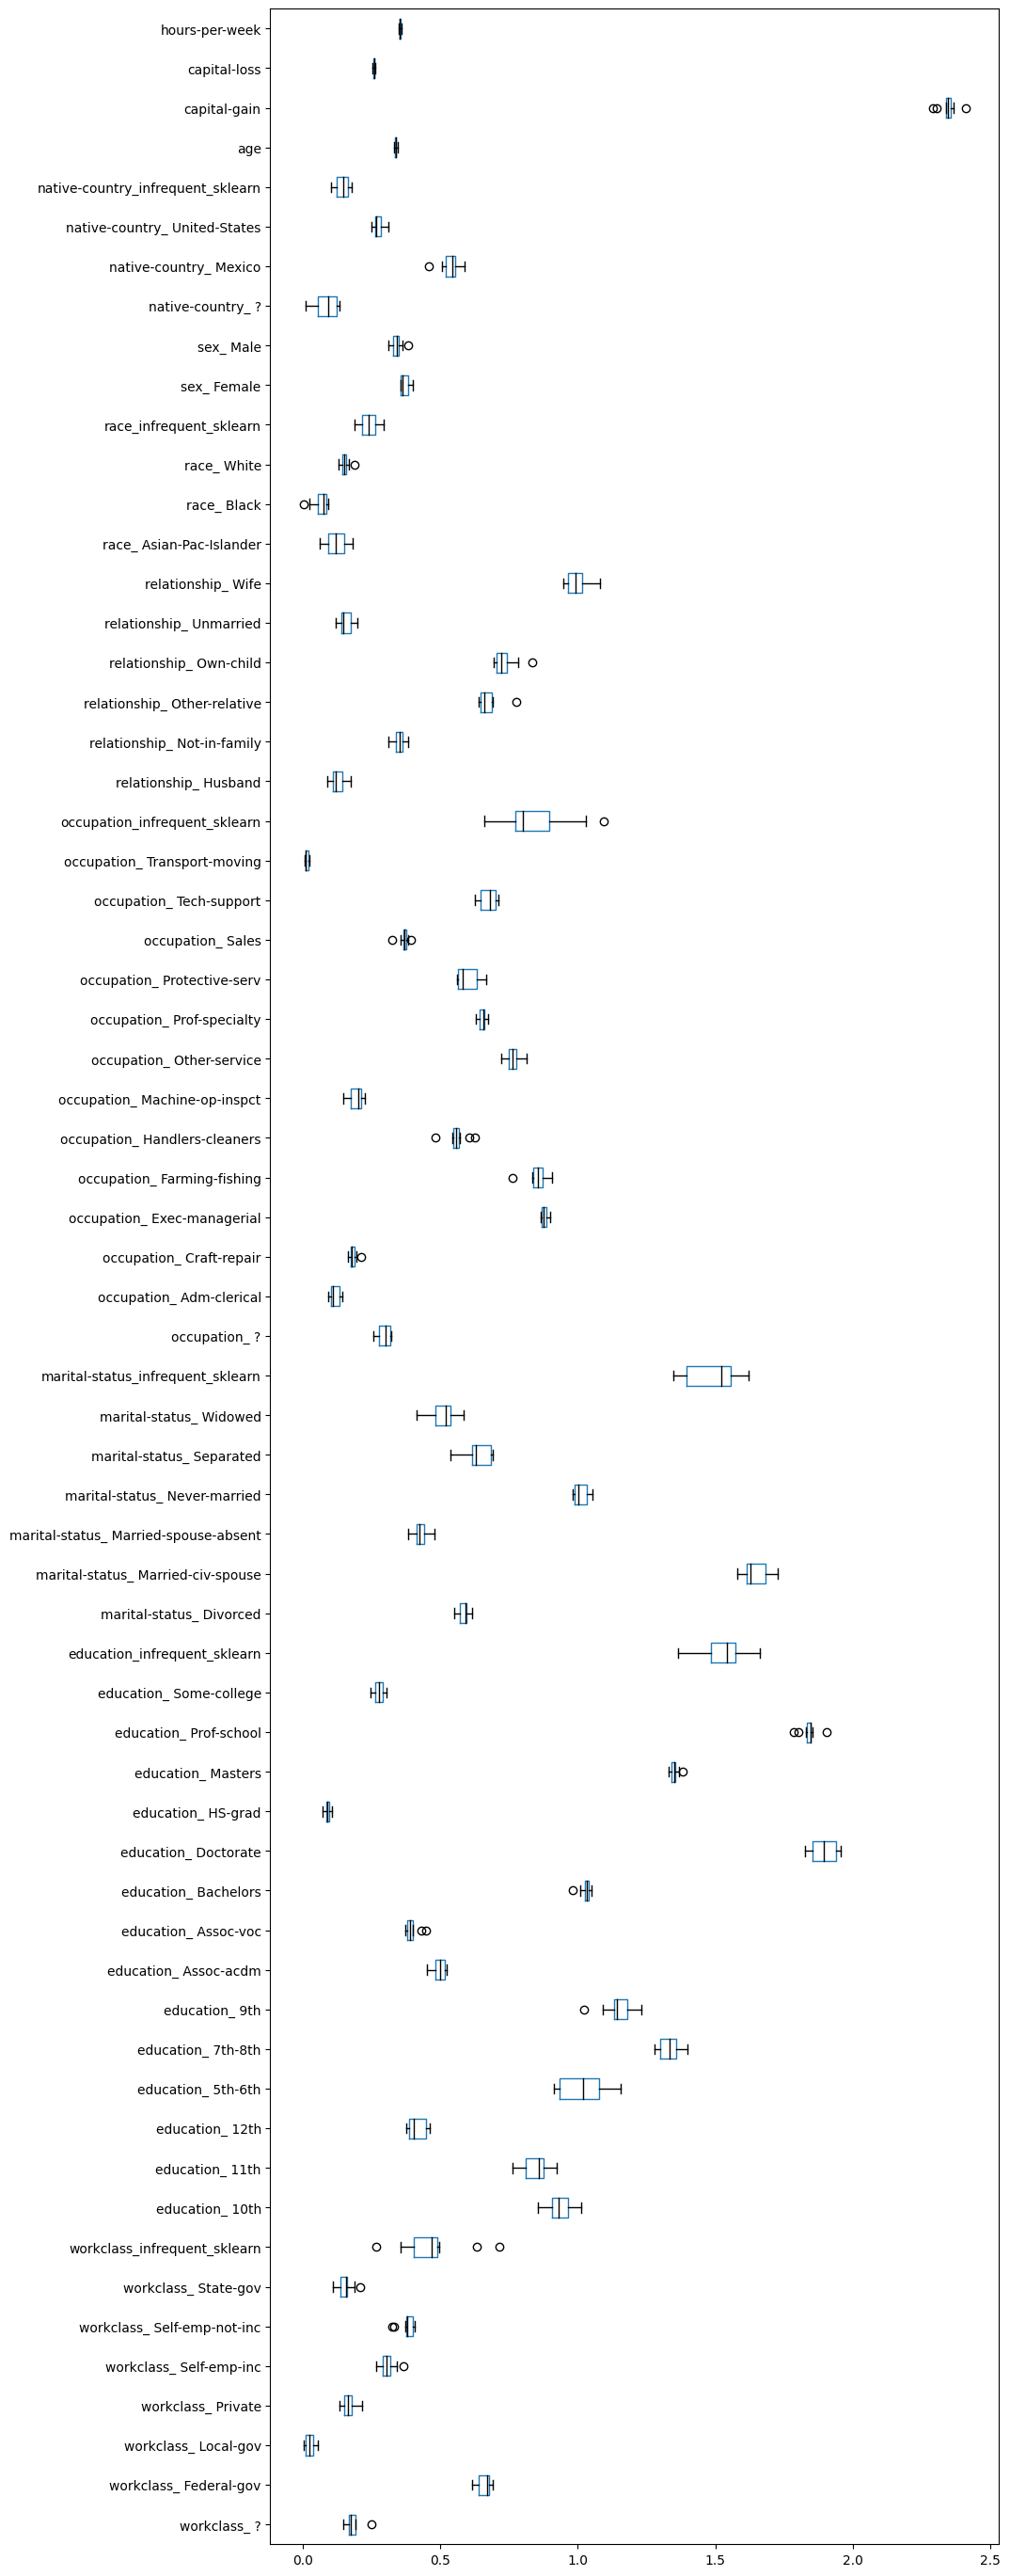

In [73]:
coefs = [
    pipeline[-1].coef_[0] for pipeline in cv_results_num_cat["estimator"]
]
coefs = pd.DataFrame(coefs, columns=feature_names)

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(color=color, vert=False, ax=ax)

In [74]:
model_with_interaction  = make_pipeline(
                            preprocessor,
                            PolynomialFeatures(degree=2, 
                                               include_bias=False, 
                                               interaction_only=True),
                            LogisticRegression(C=0.01, max_iter=5_000)
                                       )


model_with_interaction

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=0.01),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('polynomialfeatures',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=5000))])

In [75]:
cv_results_num_cat_int = cross_validate(
                    model_with_interaction,
                    data,
                    target,
                    return_estimator=True,
                    scoring="accuracy",
                    cv=10
                                    )


print(f"Mean of MAE in grams --> {cv_results_num_cat_int['test_score'].mean():.3f}")
print(f"Std dev of MAE in grams --> {cv_results_num_cat_int['test_score'].std():.3f}")

Mean of MAE in grams --> 0.853
Std dev of MAE in grams --> 0.002


A model using all features and interactions is better than a model without interactions for 8 CV iterations out of 10.


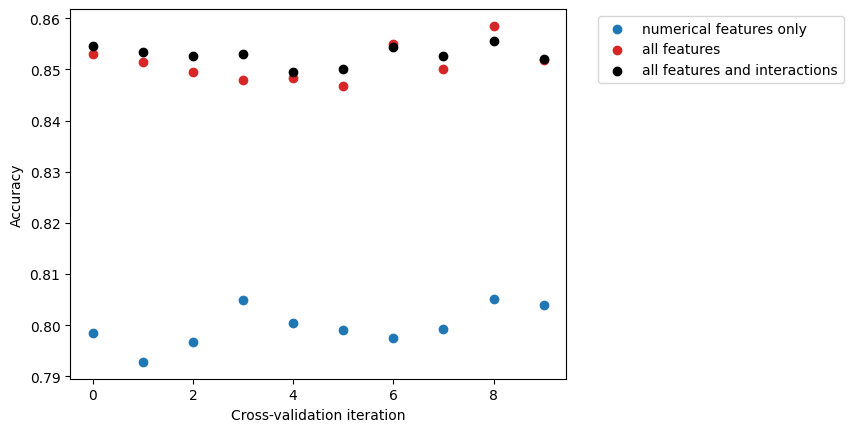

In [76]:
# solution

test_score_interactions = cv_results_num_cat_int['test_score']
plt.scatter(
    indices, test_score_lr, color="tab:blue", label="numerical features only"
)
plt.scatter(
    indices,
    test_score_complex_lr,
    color="tab:red",
    label="all features",
)
plt.scatter(
    indices,
    test_score_interactions,
    color="black",
    label="all features and interactions",
)
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using all features and interactions is better than a model"
    " without interactions for"
    f" {sum(test_score_interactions > test_score_complex_lr)} CV iterations"
    " out of 10."
)

## Regularization

In [77]:
df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv"


ames_housing = pd.read_csv(df_path)


features_of_interest = [
                            "LotFrontage",
                            "LotArea",
                            "PoolArea",
                            "YearBuilt",
                            "YrSold",
                        ]


target_name = "SalePrice"


data, target = (
    ames_housing[features_of_interest],
    ames_housing[target_name],
                )



In [78]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



linear_regression = make_pipeline(
                                    PolynomialFeatures(degree=2, include_bias=False), 
                                    LinearRegression()
                                 ).set_output(transform="pandas")


cv_results = cross_validate(
    linear_regression,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)


train_error = -cv_results["train_score"]
print(
    "Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of linear regression model on the train set:
2.85e+09 ± 8.63e+07


In [79]:
test_error = -cv_results["test_score"]
print(
    "Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of linear regression model on the test set:
8.69e+10 ± 2.47e+11


The training error is in average one order of magnitude lower than the testing
error (lower error is better). Such a gap between the training and testing
scores is an indication that our model overfitted the training set. Indeed,
this is one of the dangers when augmenting the number of features with a
`PolynomialFeatures` transformer. For instance, one does not expect features
such as `PoolArea * YrSold` to be very predictive.

To analyze the weights of the model, we can create a dataframe. The columns of
the dataframe contain the feature names, while the rows store the coefficients
of each model of a given cross-validation fold.

In order to obtain the feature names associated with each feature combination,
we need to extract them from the augmented data created by
`PolynomialFeatures`. Fortunately, scikit-learn provides a convenient method
called `feature_names_in_` for this purpose. Let's begin by retrieving the
coefficients from the model fitted in the first cross-validation fold.

In [80]:
model_first_fold = cv_results["estimator"][0]


model_first_fold

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

Now, we can access the fitted `LinearRegression` (step `-1` i.e. the last step
of the `linear_regression` pipeline) to recover the feature names.

In [81]:
feature_names = model_first_fold[-1].feature_names_in_

feature_names

array(['LotFrontage', 'LotArea', 'PoolArea', 'YearBuilt', 'YrSold',
       'LotFrontage^2', 'LotFrontage LotArea', 'LotFrontage PoolArea',
       'LotFrontage YearBuilt', 'LotFrontage YrSold', 'LotArea^2',
       'LotArea PoolArea', 'LotArea YearBuilt', 'LotArea YrSold',
       'PoolArea^2', 'PoolArea YearBuilt', 'PoolArea YrSold',
       'YearBuilt^2', 'YearBuilt YrSold', 'YrSold^2'], dtype=object)

In [82]:
# Another way of grabbing the transofrmed features
# linear_regression[0].fit_transform(data)

The following code creates a list by iterating through the estimators and
querying their last step for the learned `coef_`. We can then create the
dataframe containing all the information.

In [83]:
# Grabbing the coefficients for each fold
coefs = [est[-1].coef_ for est in cv_results["estimator"]]

weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

weights_linear_regression

LotFrontage     LotArea       PoolArea      YearBuilt        YrSold  \
0   77079.110459 -512.090773  295016.800534 -300425.727882  4.151276e+06   
1   38950.535795 -651.513682 -443749.667784 -253011.958506 -1.649656e+05   
2  107489.188285   46.540389  244398.334669 -284806.067059  2.427718e+06   
3  120924.363900   13.435421  300506.401716 -285833.879504  2.539970e+06   
4  115490.945204 -439.225499  287588.265288 -326066.013843  1.592257e+06   
5   78028.211118   89.605236  581098.767516 -254831.243398  2.225779e+06   
6  103438.169719 -293.678695  280123.084158 -244565.392478  3.459304e+06   
7  216852.441984 -495.049940  290727.579495 -258201.772769  3.487498e+06   
8   13661.821372 -497.760388      -0.000059 -295928.763399  2.737438e+06   
9  129362.628139 -603.474976      -0.000529 -254300.214087  2.026232e+06   

   LotFrontage^2  LotFrontage LotArea  LotFrontage PoolArea  \
0      -3.349087             0.013700              7.350630   
1      -3.671420             0.023363            -57.044780   
2      -0.921627            -0.013052              7.320433   
3      -3.816644             0.023443              7.532804   
4      -3.152245             0.012433              7.349500   
5      -3.891821             0.024950              9.799878   
6      -5.582935             0.018245              7.733341   
7      -2.969074             0.014630              7.108650   
8      -2.767913             0.015438             -0.753746   
9      -3.036526             0.018756             15.648797   

   LotFrontage YearBuilt  LotFrontage YrSold  LotArea^2  LotArea PoolArea  \
0               7.432073          -45.218036  -0.000025         -0.050043   
1               6.197283          -25.065176  -0.000029          0.086369   
2               7.415126          -60.426930  -0.000030         -0.041796   
3               5.945237          -65.652102  -0.000029         -0.054480   
4               7.977783          -64.916280  -0.000024         -0.048861   
5               7.302737          -45.605855  -0.000027         -0.066454   
6               7.421079          -58.219980  -0.000027         -0.048853   
7               7.161946         -114.593244  -0.000026         -0.050381   
8               6.668322          -12.988755  -0.000026          0.009407   
9               9.250921          -73.118128  -0.000029         -0.092233   

   LotArea YearBuilt  LotArea YrSold  PoolArea^2  PoolArea YearBuilt  \
0           0.022838        0.234804    1.229703            2.475124   
1           0.038975        0.288167   11.682741          279.035870   
2           0.020941       -0.040415    1.161346            3.439030   
3           0.033770       -0.037702    1.301935            2.362101   
4           0.013451        0.207696    1.220988            2.902049   
5           0.016932       -0.059451    1.845552            6.149621   
6           0.024097        0.124715    1.253121            2.661147   
7           0.022024        0.227150    1.252334            2.724081   
8           0.027393        0.223211   -0.010468            0.215043   
9           0.017277        0.285845    0.196466            0.592758   

   PoolArea YrSold  YearBuilt^2  YearBuilt YrSold     YrSold^2  
0      -149.727504    23.836875        103.331738 -1084.219849  
1       -55.356682    22.520468         82.266657     0.526541  
2      -125.490018    22.416630         98.327089  -651.731558  
3      -152.353586    22.796892         98.096774  -679.564878  
4      -146.449780    23.363805        117.031194  -453.182766  
5      -296.023211    22.303180         83.651295  -594.464349  
6      -142.521008    23.440090         76.275058  -898.316315  
7      -147.831109    24.198309         81.598868  -907.138409  
8        -0.215925    23.363781        102.024804  -732.141576  
9        -0.780995    24.040327         79.928429  -543.436299

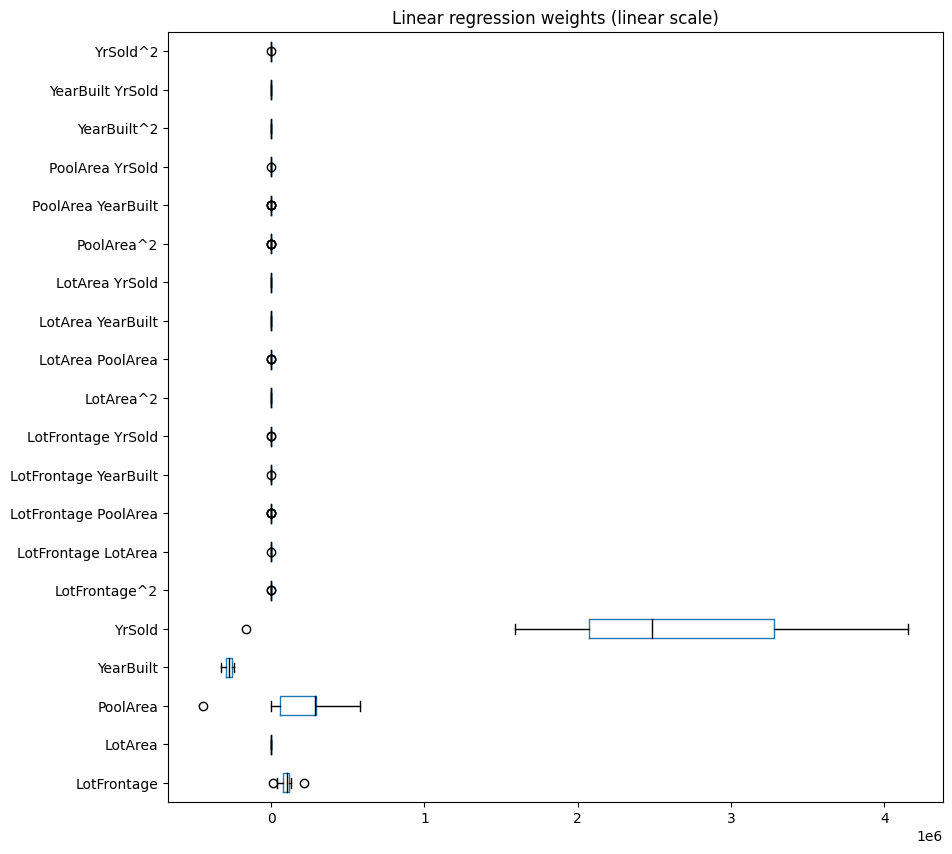

In [84]:
# Plotting the above
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Linear regression weights (linear scale)")

> By looking at the bar plot above it would seem that most of the features are
very close to zero, but this is just an effect of visualizing them on the same
scale as the extremely large span of `"YrSold"`. Instead we can use a
symmetric log scale for the plot.

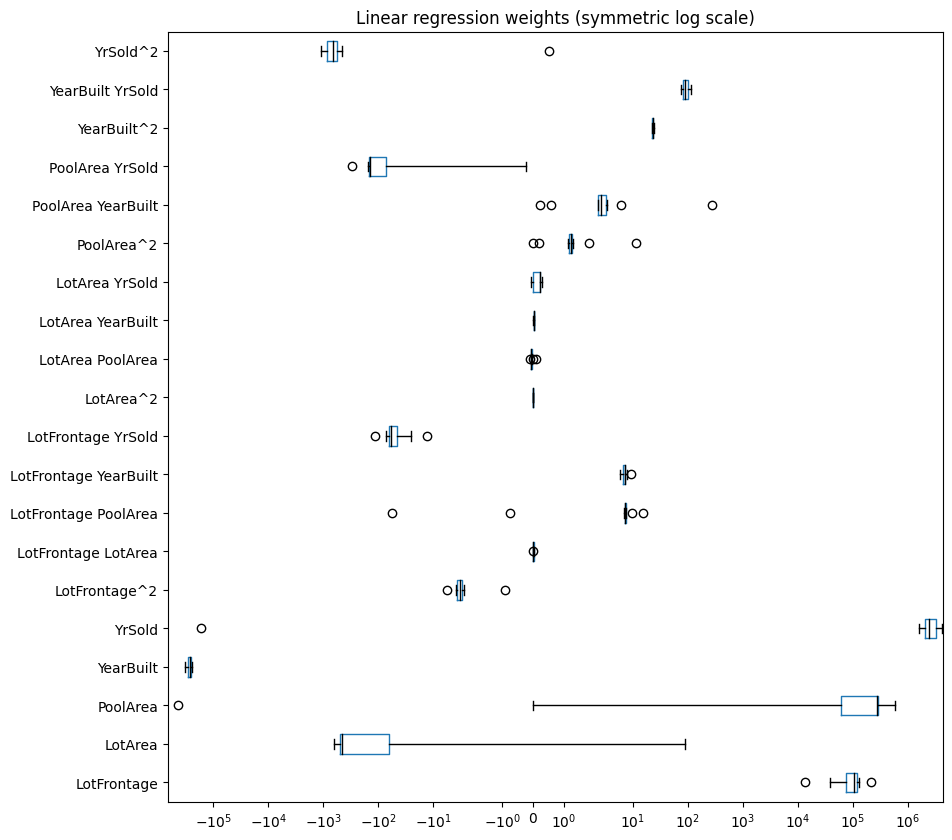

In [85]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(
    title="Linear regression weights (symmetric log scale)",
    xscale="symlog",
)

Observe that some coefficients are extremely large while others are extremely
small, yet non-zero. Furthermore, the coefficient values can be very unstable
across cross-validation folds.

We can force the linear regression model to consider all features in a more
homogeneous manner. In fact, we could force large positive or negative
weights to shrink toward zero. This is known as regularization. We use a
ridge model which enforces such behavior.

In [86]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=100, solver="cholesky"),
)


cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=20,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59923e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59556e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59609e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\pr

> 

> The above warnings are generated as a result of no scaling.

In [87]:
train_error = -cv_results["train_score"]
print(
    "Mean squared error of ridge model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of ridge model on the train set:
2.90e+09 ± 6.56e+07


In [88]:
test_error = -cv_results["test_score"]
print(
    "Mean squared error of ridge model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of ridge model on the test set:
4.55e+10 ± 1.68e+11


> Model still overfits!!!

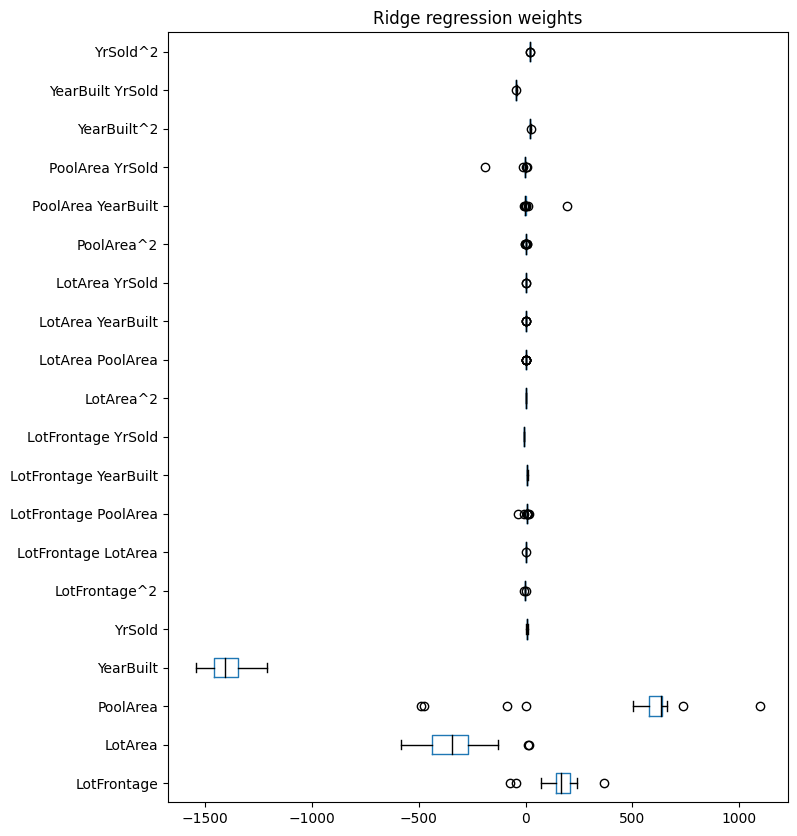

In [89]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]

weights_ridge = pd.DataFrame(coefs, columns=feature_names)


fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights")

In practice, we regularize to treat all features approximately equally by default. This can be achieved by rescaling the features.

Furthermore, many numerical solvers used internally in scikit-learn behave better when features are approximately on the same scale. Heterogeneously scaled data can be detrimental when solving for the optimal weights (hence the warnings we tend to get when fitting linear models on raw data). **Therefore, when working with a linear model and numerical data, it is generally a good practice to scale the data.**

Thus, we add a MinMaxScaler in the machine learning pipeline, which scales each feature individually such that its range maps into the range between zero and one. We place it just before the PolynomialFeatures transformer as powers of features in the range between zero and one remain in the same range.

In [90]:
from sklearn.preprocessing import MinMaxScaler


scaled_ridge = make_pipeline(
                    MinMaxScaler(),
                    PolynomialFeatures(degree=2, include_bias=False),
                    Ridge(alpha=10, solver="cholesky")
                            )


cv_results = cross_validate(
    scaled_ridge,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)


train_error = -cv_results["train_score"]
print(
    "Mean squared error of scaled ridge model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of scaled ridge model on the train set:
3.78e+09 ± 1.21e+08


In [91]:
test_error = -cv_results["test_score"]
print(
    "Mean squared error of scaled ridge model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of scaled ridge model on the test set:
3.83e+09 ± 1.17e+09


We observe that scaling data has a positive impact on the test error: it is now both lower and closer to the train error. It means that our model is less overfitted and that we are getting closer to the best generalization sweet spot.

If you want to try different solvers, you can notice that fitting this pipeline no longer generates any warning regardless of such choice. Additionally, changing the solver should no longer result in significant changes in the weights.

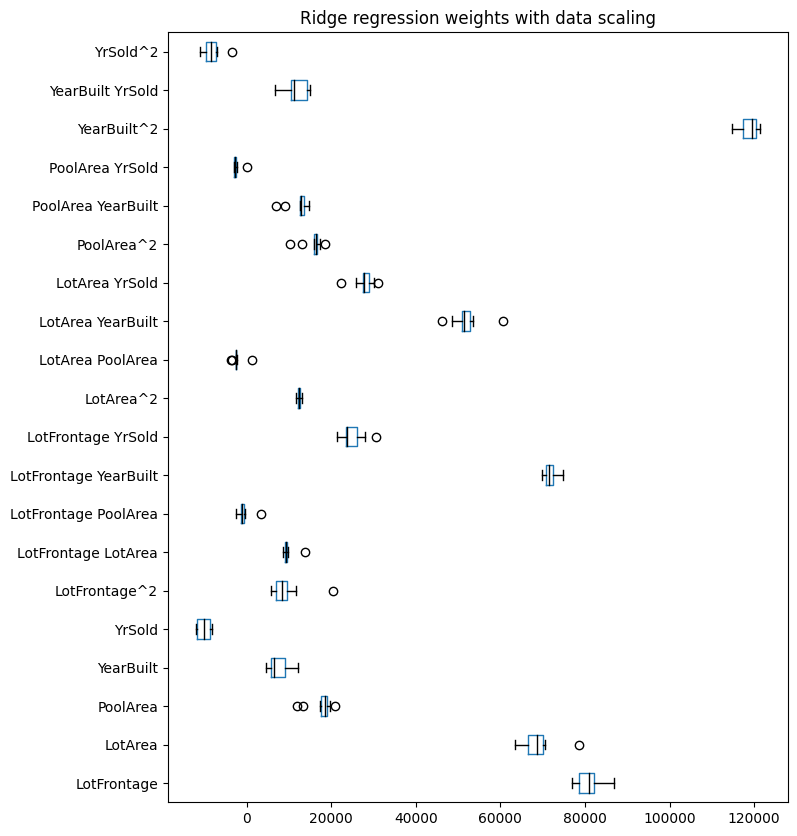

In [92]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]

weights_ridge_scaled_data = pd.DataFrame(coefs, columns=feature_names)


fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights with data scaling")

In [93]:
# Tuning alpha
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit

alphas = np.logspace(-7, 5, num=100)
ridge = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RidgeCV(alphas=alphas, store_cv_values=True),
)

cv = ShuffleSplit(n_splits=50, random_state=0)
cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=cv,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2,
)


train_error = -cv_results["train_score"]
print(
    "Mean squared error of tuned ridge model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of tuned ridge model on the train set:
3.12e+09 ± 1.25e+08


In [94]:
test_error = -cv_results["test_score"]


print(
    "Mean squared error of tuned ridge model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)


Mean squared error of tuned ridge model on the test set:
3.50e+09 ± 1.40e+09


By optimizing `alpha`, we see that the training and testing scores are close.
It indicates that our model is not overfitting.

When fitting the ridge regressor, we also requested to store the error found
during cross-validation (by setting the parameter `store_cv_values=True`). We
can plot the mean squared error for the different `alphas` regularization
strengths that we tried. The error bars represent one standard deviation of the
average mean square error across folds for a given value of `alpha`.

In [95]:
mse_alphas = [
    est[-1].cv_values_.mean(axis=0) for est in cv_results["estimator"]
]

cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)

cv_alphas = cv_alphas.aggregate(["mean", "std"]).T

cv_alphas

mean           std
1.000000e-07  5.841881e+10  5.347783e+10
1.321941e-07  5.837563e+10  5.343115e+10
1.747528e-07  5.831866e+10  5.336956e+10
2.310130e-07  5.824352e+10  5.328835e+10
3.053856e-07  5.814452e+10  5.318133e+10
...                    ...           ...
3.274549e+04  6.319038e+09  1.337394e+08
4.328761e+04  6.324503e+09  1.338181e+08
5.722368e+04  6.328652e+09  1.338778e+08
7.564633e+04  6.331799e+09  1.339232e+08
1.000000e+05  6.334185e+09  1.339576e+08

[100 rows x 2 columns]

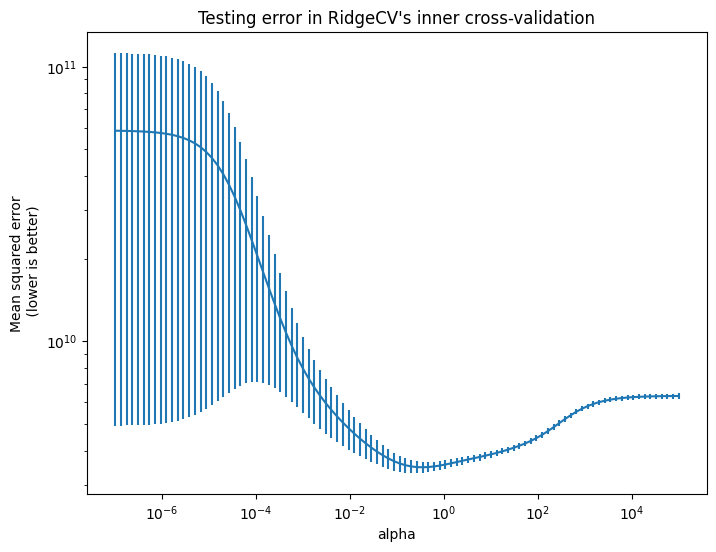

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(cv_alphas.index, cv_alphas["mean"], yerr=cv_alphas["std"])

_ = ax.set(
    xscale="log",
    xlabel="alpha",
    yscale="log",
    ylabel="Mean squared error\n (lower is better)",
    title="Testing error in RidgeCV's inner cross-validation",
)

In [97]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]

best_alphas

[0.11497569953977356,
 0.35111917342151344,
 0.1519911082952933,
 0.35111917342151344,
 0.11497569953977356,
 0.4641588833612782,
 0.4641588833612782,
 0.4641588833612782,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.11497569953977356,
 0.11497569953977356,
 0.35111917342151344,
 0.4641588833612782,
 0.11497569953977356,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.08697490026177834,
 0.6135907273413176,
 0.4641588833612782,
 0.35111917342151344,
 0.4641588833612782,
 0.4641588833612782,
 0.11497569953977356,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.11497569953977356,
 0.08697490026177834,
 0.4641588833612782,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.35

The optimal regularization strength is not necessarily the same on all
cross-validation iterations. But since we expect each cross-validation
resampling to stem from the same data distribution, it is common practice to
choose the best `alpha` to put into production as lying in the range defined
by:

In [98]:
print(
    f"Min optimal alpha: {np.min(best_alphas):.2f} and "
    f"Max optimal alpha: {np.max(best_alphas):.2f}"
)

Min optimal alpha: 0.09 and Max optimal alpha: 0.61


Summary:

- scaling features makes the effect of regularization more even: all variables
  are regularized by comparable magnitude, which would not necessarily be the
  case with the natural feature scales;
- scaling features makes the numerical solvers more stable which is also
  helpful to tune the regularization parameter more independently of the
  choice of the solver used to fit the linear model;
- tuning the regularization parameter of the `Ridge` estimator can be done
  very efficiently by using the `RidgeCV` class. Wrapping it into a
  `cross_validate` call makes it possible to assess the true generalization
  power of the whole pipeline by including the tuning of the regularization
  parameter as part of the learning process: this is an example of "nested
  cross-validation";
- doing so makes it possible to check that the optimal value of the
  regularization strength `alpha` is robust to a resampling of the dataset. If
  it wasn't the case it would hint at a problem with the dataset (e.g.
  presence of outliers in the features or the target that influence the
  learning process disproportionately) or a bad choice of other elements of
  the feature engineering pipeline.

## Regulatization of linear regression model 

In [99]:
df_url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv"

df =  pd.read_csv(df_url)

features_of_interest = [
                            "LotFrontage",
                            "LotArea",
                            "PoolArea",
                            "YearBuilt",
                            "YrSold",   
                       ]

target_name = "SalePrice"

data, target = (
                   df[features_of_interest],
                   df[target_name]
               )

Here, we use this transformer to augment the feature space. Subsequently, we
train a linear regression model. We use cross-validation with
`return_train_score=True` to evaluate both the train scores and the
generalization capabilities of our model.

In [100]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


linear_regression = make_pipeline(
                        # Build a Polynomial Featureset
                        PolynomialFeatures(degree=2, include_bias=False),
                        LinearRegression()
                                 ).set_output(transform="pandas")

cv_results = cross_validate(
    linear_regression,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

In [101]:
# Comparing the training and test scores

train_error = - cv_results["train_score"]

print(
    "Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of linear regression model on the train set:
2.85e+09 ± 8.63e+07


In [102]:
# Comparing the training and test scores

test_error = - cv_results["test_score"]

print(
    "Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of linear regression model on the test set:
8.69e+10 ± 2.47e+11


The training error is in average one order of magnitude lower than the testing
error (lower error is better). Such a gap between the training and testing
scores is an indication that our model overfitted the training set. Indeed,
this is one of the dangers when augmenting the number of features with a
`PolynomialFeatures` transformer. For instance, one does not expect features
such as `PoolArea * YrSold` to be very predictive.

To analyze the weights of the model, we can create a dataframe. The columns of
the dataframe contain the feature names, while the rows store the coefficients
of each model of a given cross-validation fold.

In order to obtain the feature names associated with each feature combination,
we need to extract them from the augmented data created by
`PolynomialFeatures`. Fortunately, scikit-learn provides a convenient method
called `feature_names_in_` for this purpose. Let's begin by retrieving the
coefficients from the model fitted in the first cross-validation fold.

In [110]:
model_first_fold = cv_results["estimator"][0]

model_first_fold

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [114]:
feature_names = model_first_fold[-1].feature_names_in_


feature_names

array(['LotFrontage', 'LotArea', 'PoolArea', 'YearBuilt', 'YrSold',
       'LotFrontage^2', 'LotFrontage LotArea', 'LotFrontage PoolArea',
       'LotFrontage YearBuilt', 'LotFrontage YrSold', 'LotArea^2',
       'LotArea PoolArea', 'LotArea YearBuilt', 'LotArea YrSold',
       'PoolArea^2', 'PoolArea YearBuilt', 'PoolArea YrSold',
       'YearBuilt^2', 'YearBuilt YrSold', 'YrSold^2'], dtype=object)

In [117]:
# Getting your  coefs

coefs = [ est[-1].coef_ for est in cv_results["estimator"]]

weights_lin_reg = pd.DataFrame(coefs, columns=feature_names)

weights_lin_reg

LotFrontage     LotArea       PoolArea      YearBuilt        YrSold  \
0   77079.110459 -512.090773  295016.800534 -300425.727882  4.151276e+06   
1   38950.535795 -651.513682 -443749.667784 -253011.958506 -1.649656e+05   
2  107489.188285   46.540389  244398.334669 -284806.067059  2.427718e+06   
3  120924.363900   13.435421  300506.401716 -285833.879504  2.539970e+06   
4  115490.945204 -439.225499  287588.265288 -326066.013843  1.592257e+06   
5   78028.211118   89.605236  581098.767516 -254831.243398  2.225779e+06   
6  103438.169719 -293.678695  280123.084158 -244565.392478  3.459304e+06   
7  216852.441984 -495.049940  290727.579495 -258201.772769  3.487498e+06   
8   13661.821372 -497.760388      -0.000059 -295928.763399  2.737438e+06   
9  129362.628139 -603.474976      -0.000529 -254300.214087  2.026232e+06   

   LotFrontage^2  LotFrontage LotArea  LotFrontage PoolArea  \
0      -3.349087             0.013700              7.350630   
1      -3.671420             0.023363            -57.044780   
2      -0.921627            -0.013052              7.320433   
3      -3.816644             0.023443              7.532804   
4      -3.152245             0.012433              7.349500   
5      -3.891821             0.024950              9.799878   
6      -5.582935             0.018245              7.733341   
7      -2.969074             0.014630              7.108650   
8      -2.767913             0.015438             -0.753746   
9      -3.036526             0.018756             15.648797   

   LotFrontage YearBuilt  LotFrontage YrSold  LotArea^2  LotArea PoolArea  \
0               7.432073          -45.218036  -0.000025         -0.050043   
1               6.197283          -25.065176  -0.000029          0.086369   
2               7.415126          -60.426930  -0.000030         -0.041796   
3               5.945237          -65.652102  -0.000029         -0.054480   
4               7.977783          -64.916280  -0.000024         -0.048861   
5               7.302737          -45.605855  -0.000027         -0.066454   
6               7.421079          -58.219980  -0.000027         -0.048853   
7               7.161946         -114.593244  -0.000026         -0.050381   
8               6.668322          -12.988755  -0.000026          0.009407   
9               9.250921          -73.118128  -0.000029         -0.092233   

   LotArea YearBuilt  LotArea YrSold  PoolArea^2  PoolArea YearBuilt  \
0           0.022838        0.234804    1.229703            2.475124   
1           0.038975        0.288167   11.682741          279.035870   
2           0.020941       -0.040415    1.161346            3.439030   
3           0.033770       -0.037702    1.301935            2.362101   
4           0.013451        0.207696    1.220988            2.902049   
5           0.016932       -0.059451    1.845552            6.149621   
6           0.024097        0.124715    1.253121            2.661147   
7           0.022024        0.227150    1.252334            2.724081   
8           0.027393        0.223211   -0.010468            0.215043   
9           0.017277        0.285845    0.196466            0.592758   

   PoolArea YrSold  YearBuilt^2  YearBuilt YrSold     YrSold^2  
0      -149.727504    23.836875        103.331738 -1084.219849  
1       -55.356682    22.520468         82.266657     0.526541  
2      -125.490018    22.416630         98.327089  -651.731558  
3      -152.353586    22.796892         98.096774  -679.564878  
4      -146.449780    23.363805        117.031194  -453.182766  
5      -296.023211    22.303180         83.651295  -594.464349  
6      -142.521008    23.440090         76.275058  -898.316315  
7      -147.831109    24.198309         81.598868  -907.138409  
8        -0.215925    23.363781        102.024804  -732.141576  
9        -0.780995    24.040327         79.928429  -543.436299

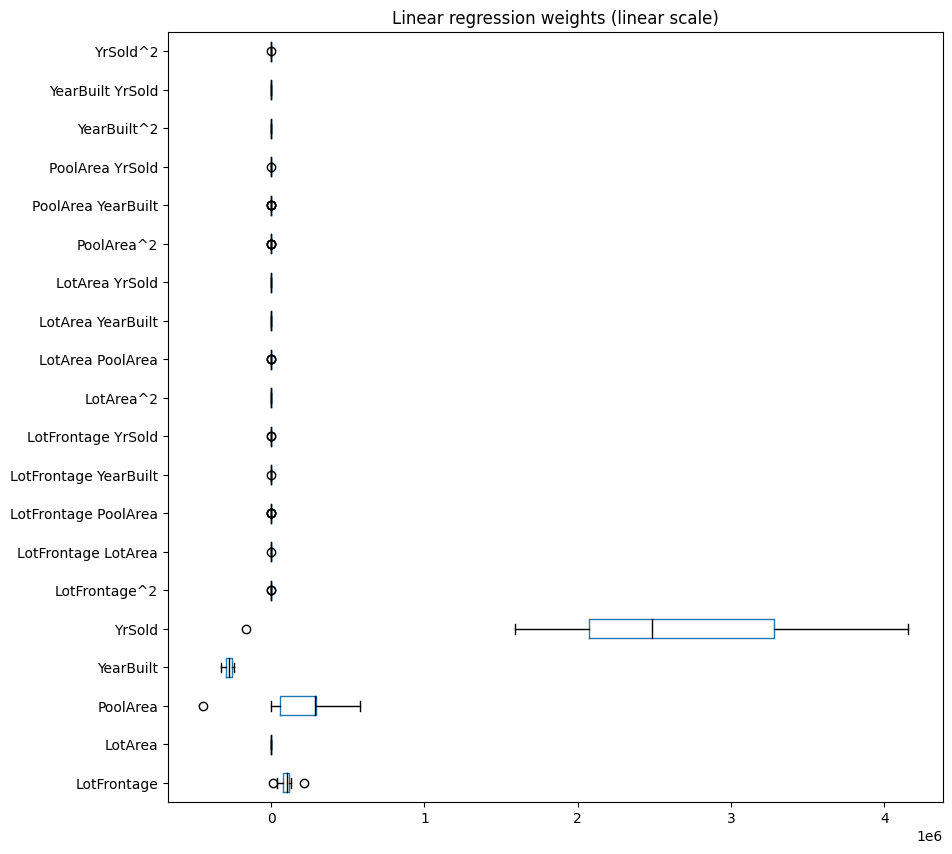

In [118]:
# Lets look at the variations
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Linear regression weights (linear scale)")

By looking at the bar plot above it would seem that most of the features are
very close to zero, but this is just an effect of visualizing them on the same
scale as the extremely large span of `"YrSold"`. Instead we can use a
symmetric log scale for the plot.

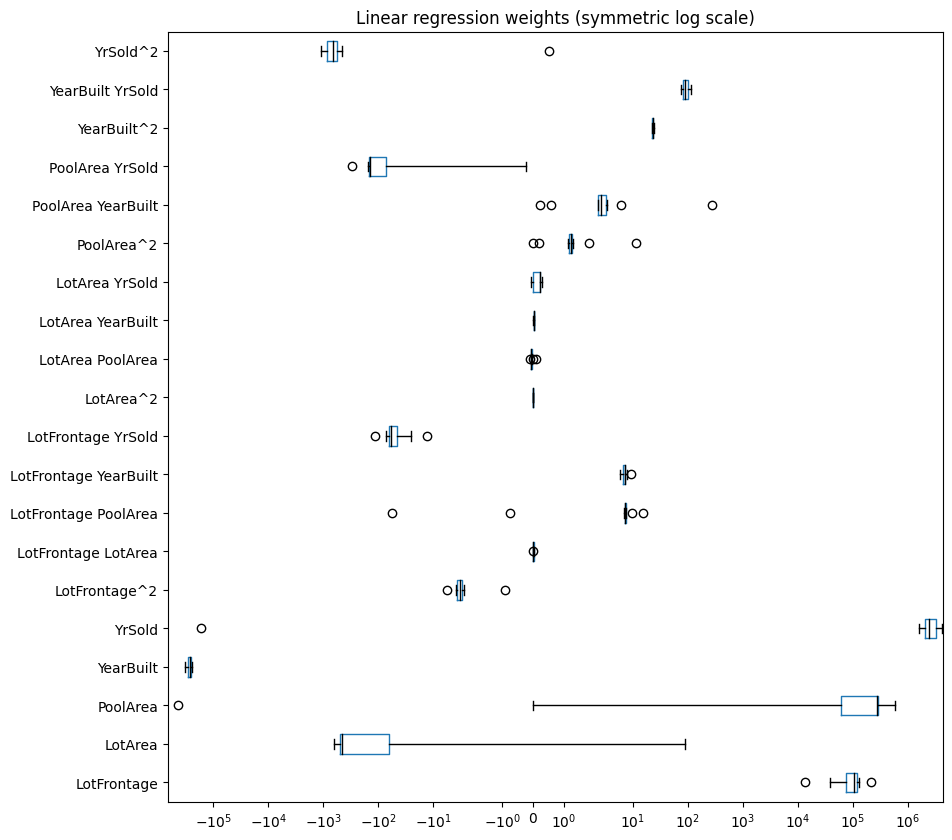

In [119]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(
    title="Linear regression weights (symmetric log scale)",
    xscale="symlog",
)

Observe that some coefficients are extremely large while others are extremely
small, yet non-zero. Furthermore, the coefficient values can be very unstable
across cross-validation folds.

We can force the linear regression model to consider all features in a more
homogeneous manner. In fact, we could force large positive or negative
weights to shrink toward zero. This is known as regularization. We use a
ridge model which enforces such behavior.

In [121]:
# Initializing a ridge regression
from sklearn.linear_model import Ridge

ridge_regression = make_pipeline(
                        # Build a Polynomial Featureset
                        PolynomialFeatures(degree=2, include_bias=False),
                        Ridge(alpha=100, solver="cholesky")
                                 ).set_output(transform="pandas")

cv_results = cross_validate(
    ridge_regression,
    data,
    target,
    cv=20,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59923e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59556e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59609e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\pr

In [122]:
# Comparing the training and test scores

train_error = - cv_results["train_score"]

print(
    "Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of linear regression model on the train set:
2.90e+09 ± 6.56e+07


In [123]:
# Comparing the training and test scores

test_error = - cv_results["test_score"]

print(
    "Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of linear regression model on the test set:
4.55e+10 ± 1.68e+11


We see that the training and testing scores get closer, indicating that our
model is less overfitting (yet still overfitting!). We can compare the values
of the weights of ridge with the un-regularized linear regression.

In [124]:
# Getting your  coefs

coefs = [ est[-1].coef_ for est in cv_results["estimator"]]

weights_ridge_reg = pd.DataFrame(coefs, columns=feature_names)

weights_ridge_reg

LotFrontage     LotArea     PoolArea    YearBuilt    YrSold  \
0    157.336603 -501.970214   635.847423 -1472.105274  9.358476   
1    142.681822 -373.394535   634.171329 -1458.665234  4.420719   
2    -46.439335 -446.864970  -476.132083 -1211.366965  4.856556   
3    240.473693 -512.082759   638.729956 -1448.490979  3.044602   
4    189.659851   10.255916   502.682574 -1491.936742  5.208766   
5    166.663092 -223.794113   637.348287 -1359.875669  6.197671   
6    239.429802 -241.717492   630.085651 -1445.200988  4.781274   
7    168.658689 -128.124243   660.439575 -1413.565678  6.453800   
8    207.127245 -362.537101   638.926272 -1444.760948  6.610743   
9    149.062068 -408.115541   624.888060 -1542.195704  2.998166   
10   110.879790   16.558027   630.526436 -1348.213730  5.467065   
11   221.083068 -309.310244  1095.915376 -1329.980997  4.502343   
12   159.339610 -279.436566   603.446678 -1274.160784  6.793236   
13   202.599702 -361.546143   633.492812 -1356.341071  6.451574   
14   212.069883 -437.270803   633.014126 -1397.612137  7.637885   
15   366.921951 -308.830841   644.229041 -1257.100905  5.623893   
16   -70.775614 -584.845963     0.004395 -1503.716783  4.898848   
17    74.250121 -280.064940   -88.867676 -1460.391733  8.122691   
18   144.751971 -326.295428  -490.229588 -1391.820090  9.078831   
19   206.486510 -582.379702   736.824698 -1283.838619  2.033856   

    LotFrontage^2  LotFrontage LotArea  LotFrontage PoolArea  \
0       -3.444733             0.012644              7.162220   
1       -3.449220             0.013470              7.154761   
2       -2.973189             0.016482            -36.254294   
3       -4.033735             0.017066              7.263796   
4       -0.045753            -0.024908              7.105251   
5       -3.747352             0.016798              7.258750   
6       -3.528149             0.014325              7.228552   
7       -3.839602             0.021259              7.290369   
8       -3.354019             0.013943              7.221936   
9       -3.421168             0.011060              7.139575   
10      -4.120224             0.018272              7.155062   
11      -3.450523             0.017124              8.636125   
12      -5.920258             0.016695              7.593091   
13      -3.593501             0.014403              7.184845   
14      -3.462485             0.013601              7.172308   
15      -3.134706             0.014370              7.074362   
16      -2.747425             0.014393             -5.318883   
17      -3.176429             0.019859              6.360247   
18      -3.249731             0.016227             16.859168   
19      -3.198461             0.018424             10.362606   

    LotFrontage YearBuilt  LotFrontage YrSold  LotArea^2  LotArea PoolArea  \
0                7.997455           -7.453025  -0.000025         -0.049128   
1                7.529397           -6.994279  -0.000025         -0.049329   
2                8.486986           -7.904833  -0.000025          0.042839   
3                6.102870           -5.624351  -0.000027         -0.049997   
4                9.474185           -9.007923  -0.000029         -0.037420   
5                6.483384           -5.987512  -0.000027         -0.050806   
6                7.006567           -6.542273  -0.000026         -0.049495   
7                7.116397           -6.633598  -0.000028         -0.053345   
8                7.929338           -7.448838  -0.000026         -0.049783   
9                8.187203           -7.628798  -0.000024         -0.047645   
10               8.182758           -7.579494  -0.000025         -0.049608   
11               6.925883           -6.485252  -0.000026         -0.059827   
12               8.056647           -7.372337  -0.000026         -0.047444   
13               7.248824           -6.745507  -0.000026         -0.049569   
14               7.129653           -6.638558  -0.000026         -0.049233   
15 

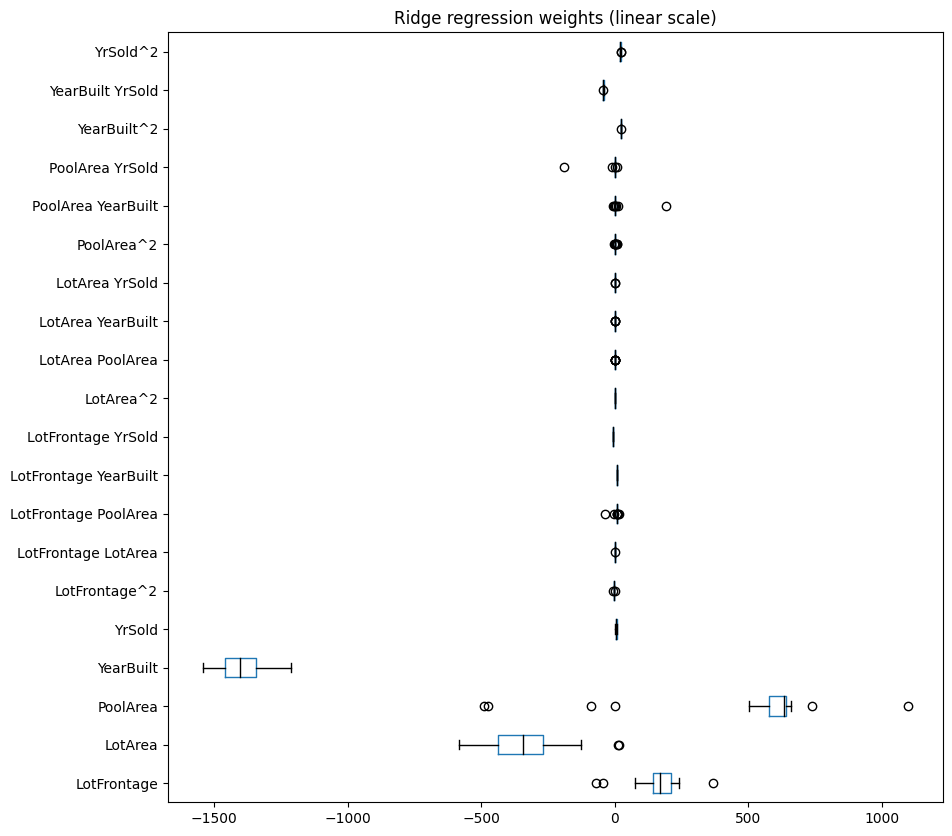

In [126]:
# Lets look at the variations
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge_reg.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights (linear scale)")

Notice that the overall magnitudes of the weights are shrunk
(yet non-zero!) with respect to the linear regression modelt.

You can also observe that even if the weights' values are less extreme, they
are still unstable from one fold to another. Even worst, the results can vary
a lot depending on the choice of the solver (for instance try to set
`solver="saga"` or `solver="lsqr"` instead of `solver="cholesky"` and re-run
the above cells).

In the following we attempt to resolve those remaining problems, by
focusing on two important aspects we omitted so far:
- the need to **scale the data**, and
- the need to **search for the best regularization parameter**.

## Feature scaling and regularization

On the one hand, weights define the association between feature values and the
predicted target, which depends on the scales of both the feature values and
the target. On the other hand, regularization adds constraints on the weights
of the model through the `alpha` parameter. Therefore, the effect that feature
rescaling has on the final weights also interacts with the use of
regularization.

Let's consider the case where features live on the same scale/units: if two
features are found to be equally important by the model, they are affected
similarly by the regularization strength.

Now, let's consider the scenario where two features have completely different
data scales (for instance age in years and annual revenue in dollars). Let's
also equally predictive andely equally predictive and are
not too correlated. Fitting a linear regularization would give the feature a higher weighte a higher weight to the feature with the smallest
natural scale. If we add regularization, the feature with the smallest natural
scale would be penalized more than the other feature. This is not desirable
given the hypothesis that both features are equally important. In such case we
require the regularization to stay neutral.

In practice, we don't know ahead of time which ,features are predictive, and
therefore we want regularization to treat all features approximately equally
by default. This can be achieved by rescaling the features.

Furthermore, many numerical solvers used internally in scikit-learn behave
better when features are approximately on the same scale. Heterogeneously
scaled data can be detrimental when solving for the optimal weights (hence the
warnings we tend to get when fitting linear models on raw data). Therefore,
when working with a linear model and numerical data, it is generally a good
practice to scale the data.

Thus, we add a `MinMaxScaler` in the machine learning pipeline, which scales
each feature individually such that its range maps into the range between zero
and one. We place it just before the `Poles` transformer as
powers of features in the range between zero and one remain in the same range.

In [128]:
from sklearn.preprocessing import MinMaxScaler


scaled_ridge = make_pipeline(
                    # Let's scale the features
                    MinMaxScaler(),
                    # Adding Polynomial Features
                    PolynomialFeatures(degree=2, include_bias=False),
                    # Performing Ridge Regression
                    Ridge(alpha=10, solver="cholesky")
                            )


cv_results = cross_validate(
    scaled_ridge,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

In [129]:
# Comparing the training and test scores

train_error = - cv_results["train_score"]

print(
    "Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of linear regression model on the train set:
3.78e+09 ± 1.21e+08


In [130]:
# Comparing the training and test scores

test_error = - cv_results["test_score"]

print(
    "Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of linear regression model on the test set:
3.83e+09 ± 1.17e+09


We observe that scaling data has a positive impact on the test error: it is
now both lower and closer to the train error. It means that our model is less
overfitted and that we are getting closer to the best generalization sweet
spot.

If you want to try different solvers, you can notice that fitting this
pipeline no longer generates any warning regardless of such choice.
Additionally, changing the solver should no longer result in significant
changes in the weights.

Let's have an additional look to the different weights.

In [131]:
# Getting your  coefs

coefs = [ est[-1].coef_ for est in cv_results["estimator"] ]

weights_scaled_ridge_reg = pd.DataFrame(coefs, columns=feature_names)

weights_scaled_ridge_reg

LotFrontage       LotArea      PoolArea     YearBuilt        YrSold  \
0  83885.345474  67976.720594  18626.556854   4501.599550  -8171.971204   
1  77018.120067  66100.887335  17448.165825  12043.637187  -9063.296543   
2  77253.317074  78636.921709  18424.548036   6385.649704 -11777.263944   
3  80202.541046  68130.437801  19020.723401   9745.225713 -11771.839741   
4  80655.399616  63423.268191  19635.256891   6367.021192  -8573.178689   
5  81420.382100  65493.015663  20916.568480  11851.119124 -10440.244184   
6  81602.615425  70615.100083  18213.089493   7449.022115  -9603.842274   
7  82376.321198  70182.210636  18531.569817   6553.310346  -8369.534130   
8  78011.608279  69912.009829  11848.841726   5403.403729 -11593.130062   
9  86795.791050  69066.743254  13343.932237   5589.866624 -11963.104651   

   LotFrontage^2  LotFrontage LotArea  LotFrontage PoolArea  \
0    8227.568801          9087.220298          -1193.185183   
1    5808.757752          8691.044110          -1629.669182   
2    6093.512829          8784.959328          -1434.416057   
3    8296.465518          9582.584799           -606.541132   
4    8080.285202          8933.750810           -377.660425   
5    6675.118623          9284.517222           -497.016162   
6   11706.954591          9792.732164          -1257.695545   
7    9281.994838          9572.105400          -1088.180078   
8   20507.151030         13845.646148           3333.291638   
9    9788.677330          9417.285662          -2602.119907   

   LotFrontage YearBuilt  LotFrontage YrSold     LotArea^2  LotArea PoolArea  \
0           73416.626609        27978.142550  12014.868883      -2546.908863   
1           70431.253645        25281.870650  11592.217702      -2570.748524   
2           69858.112132        21289.153262  12535.691527      -3594.105974   
3           70554.750774        21808.007551  12554.560840      -2395.616574   
4           71146.891922        23468.264349  12094.538349      -2328.432673   
5           71720.782702        23452.484034  12676.459338      -2405.931095   
6           72380.059912        23486.220469  12223.831450      -2585.711029   
7           72289.810113        23871.668524  12448.397738      -2521.809056   
8           71325.549249        30555.247483  13153.828663       1173.703914   
9           74737.745399        26404.835005  12867.197721      -3574.076857   

   LotArea YearBuilt  LotArea YrSold    PoolArea^2  PoolArea YearBuilt  \
0       50794.944282    29003.657360  16561.028943        12822.503100   
1       51204.627452    27876.335216  15843.531598        13514.691799   
2       60562.392473    31169.873518  16403.616337        12757.380589   
3       51544.429117    27547.997052  16739.673383        13259.490374   
4       46093.099386    25826.082730  17239.133127        13731.629559   
5       48637.637984    22290.428190  18523.726875        14644.622514   
6       53111.955027    27529.268878  16201.180381        12577.309914   
7       52223.772199    28270.585886  16441.529239        12806.400259   
8       53628.346888    30193.725325  10158.099491         6912.894940   
9       51100.429651    27491.454250  13021.571477         8999.235487   

   PoolArea YrSold    YearBuilt^2  YearBuilt YrSold      YrSold^2  
0     -2905.514388  120070.742187      14634.533829 -10945.219213  
1     -2243.486375  120541.907162       6751.329976  -3354.622973  
2     -2925.823493  114695.820780      14302.717240  -7262.299055  
3     -2552.781306  117718.080507      11275.593979  -7320.156062  
4     -2529.086311  116202.794570      14935.204163  -6913.927294  
5     -2868.785532  117213.400308       9990.804595  -7776.062298  
6     -2845.345914  119049.962081      10407.567211 -10086.363330  
7     -2803.795253  119921.519993      10655.999165  -9632.016152  
8         0.000000  121293.180530      14167.571558  -9209.573755  
9     -3000.447558  121118.780982      11070.419704  -8860.711973

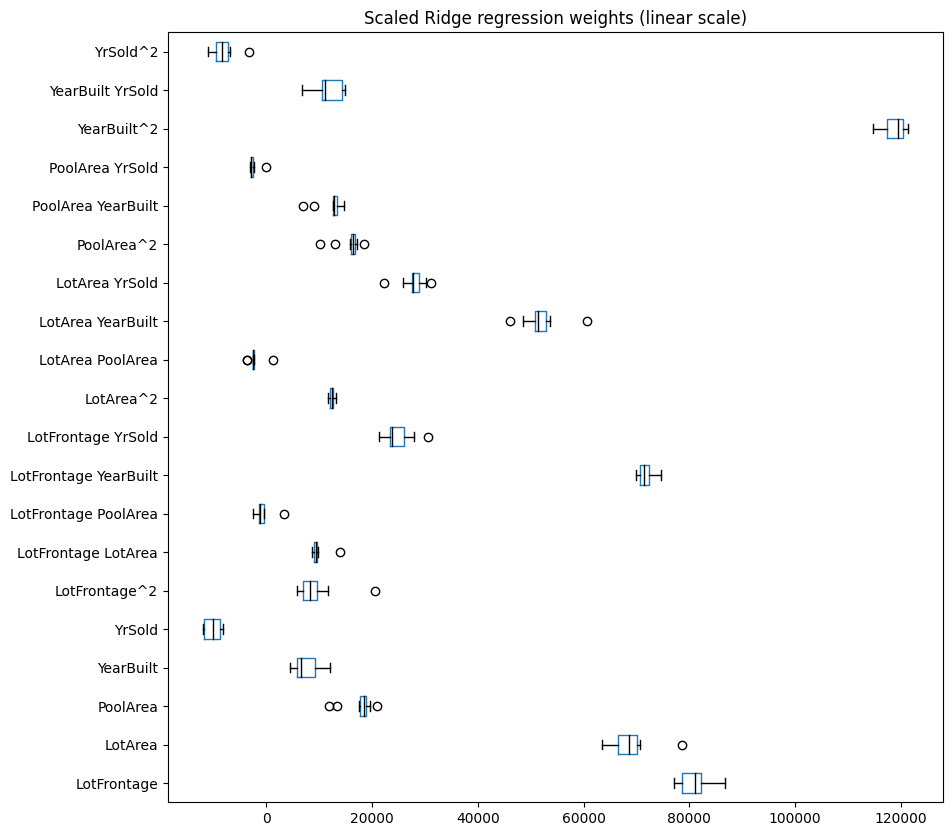

In [132]:
# Lets look at the variations
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_scaled_ridge_reg.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Scaled Ridge regression weights (linear scale)")

## Tuning the Regularization Parameter

The regularization parameter needs to be tuned on each dataset.
The default parameter does not lead to the optimal model. Therefore, we need
to tune the `alpha` parameter.

Model hyperparameter tuning should be done with care. Indeed, we want to find
an optimal parameter that maximizes some metrics. Thus, it requires both a
training set and testing set.

However, this testing set should be different from the out-of-sample testing
set that we used to evaluate our model: if we use the same one, we are using
an `alpha` which was optimized for this testing set and it breaks the
out-of-sample rule.

Therefore, we should include search of the hyperparameter `alpha` within the
cros grid-search.
However, some predictor in scikit-learn are available wit  an integrated
hyperparameter search, more efficient than using a grid-search. The name of
these predictors finishes by `CV`. In the case of `Ridge`, scikit-learn
provides a `RidgeCV` regressor.

Cross-validating a pipeline that contains such predictors allows to make a
nested cross-validation: the inner cross-validation searches for the best
alpha, while the outer cross-validation gives an estimate of the testing
score.

In [138]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=50, random_state=0)
alphas = np.logspace(-7, 5, num=100)

scaled_ridge = make_pipeline(
                    # Let's scale the features
                    MinMaxScaler(),
                    # Adding Polynomial Features
                    PolynomialFeatures(degree=2, include_bias=False),
                    # Performing CV Ridge Regression
                    RidgeCV(alphas=alphas, store_cv_values=True)
                            )


cv_results = cross_validate(
    scaled_ridge,
    data,
    target,
    cv=cv,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

In [139]:
# Comparing the training and test scores

train_error = - cv_results["train_score"]

print(
    "Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of linear regression model on the train set:
3.12e+09 ± 1.25e+08


In [140]:
# Comparing the training and test scores

test_error = - cv_results["test_score"]

print(
    "Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of linear regression model on the test set:
3.50e+09 ± 1.40e+09


By optimizing `alpha`, we see that the training and testing scores are close.
It indicates that our model is not overfitting.

When fitting the ridge regressor, we also requested to store the error found
during cross-validation (by setting the parameter `store_cv_values=True`). We
can plot the mean squared error for the different `alphas` regularization
strengths that we tried. The error bars represent one standard deviation of the
average mean square error across folds for a given value of `alpha`.

In [141]:
mse_alphas = [
    est[-1].cv_values_.mean(axis=0) for est in cv_results["estimator"]
]

cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas = cv_alphas.aggregate(["mean", "std"]).T
cv_alphas

mean           std
1.000000e-07  5.841881e+10  5.347783e+10
1.321941e-07  5.837563e+10  5.343115e+10
1.747528e-07  5.831866e+10  5.336956e+10
2.310130e-07  5.824352e+10  5.328835e+10
3.053856e-07  5.814452e+10  5.318133e+10
...                    ...           ...
3.274549e+04  6.319038e+09  1.337394e+08
4.328761e+04  6.324503e+09  1.338181e+08
5.722368e+04  6.328652e+09  1.338778e+08
7.564633e+04  6.331799e+09  1.339232e+08
1.000000e+05  6.334185e+09  1.339576e+08

[100 rows x 2 columns]

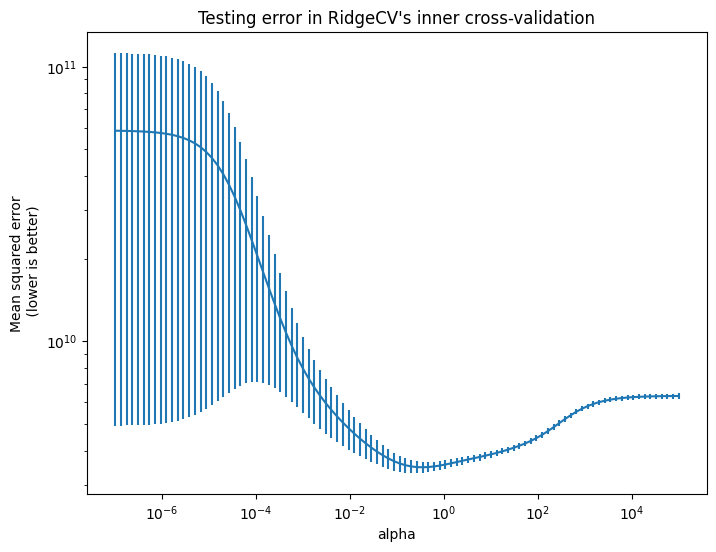

In [143]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(cv_alphas.index, cv_alphas["mean"], yerr=cv_alphas["std"])
_ = ax.set(
    xscale="log",
    xlabel="alpha",
    yscale="log",
    ylabel="Mean squared error\n (lower is better)",
    title="Testing error in RidgeCV's inner cross-validation",
)

As we can see, regularization is just like salt in cooking: one must balance
its amount to get the best generalization performance. We can check if the
best `alpha` found is stable across the cross-validation fold.

In [142]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]

best_alphas

[0.11497569953977356,
 0.35111917342151344,
 0.1519911082952933,
 0.35111917342151344,
 0.11497569953977356,
 0.4641588833612782,
 0.4641588833612782,
 0.4641588833612782,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.11497569953977356,
 0.11497569953977356,
 0.35111917342151344,
 0.4641588833612782,
 0.11497569953977356,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.08697490026177834,
 0.6135907273413176,
 0.4641588833612782,
 0.35111917342151344,
 0.4641588833612782,
 0.4641588833612782,
 0.11497569953977356,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.11497569953977356,
 0.08697490026177834,
 0.4641588833612782,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.35

The optimal regularization strength is not necessarily the same on all
cross-validation iterations. But since we expect each cross-validation
resampling to stem from the same data distribution, it is common practice to
choose the best `alpha` to put into production as lying in the range defined
by:

In [144]:
print(
    f"Min optimal alpha: {np.min(best_alphas):.2f} and "
    f"Max optimal alpha: {np.max(best_alphas):.2f}"
)

Min optimal alpha: 0.09 and Max optimal alpha: 0.61


This range can be reduced depending on the feature engineering and
preprocessing.

Here is a summary of important points highlighted in this notebook:
- scaling features makes the effect of regularization more even: all variables
  are regularized by comparable magnitude, which would not necessarily be the
  case with the natural feature scales;
- scaling features makes the numerical solvers more stable which is also
  helpful to tune the regularization parameter more independently of the
  choice of the solver used to fit the line

- For categorical features, it is generally common to omit scaling when features are encoded with a OneHotEncoder since the feature values are already on a similar scale. 
However, this choice may depend on the scaling method and the user case. For instance, standard scaling categorical features that are imbalanced (e.g. more occurrences of a specific category) would even out the impact of regularization to each category. However, scaling such features in the presence of rare categories could be problematic (i.e. division by a very small standard deviation) and it can therefore introduce numerical issues.ar model;
- tuning the regularization parameter of the `Ridge` estimator can be done
  very efficiently by using the `RidgeCV` class. Wrapping it into a
  `cross_validate` call makes it possible to assess the true generalization
  power of the whole pipeline by including the tuning of the regularization
  parameter as part of the learning process: this is an example of "nested
  cross-validation";
- doing so makes it possible to check that the optimal value of the
  regularization strength `alpha` is robust to a resampling of the dataset. If
  it wasn't the case it would hint at a problem with the dataset (e.g.
  presence of outliers in the features or the target that influence the
  learning process disproportionately) or a bad choice of other elements of
  the feature engineering pipeline.

## More Regularization with Logistic Regression

In [145]:
df_url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins_classification.csv"

penguins = pd.read_csv(df_url)
penguins = (
    # Select the Adelie and Chinstrap species
    penguins.set_index("Species").loc[["Adelie", "Chinstrap"]].reset_index()
)

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"



penguins_train, penguins_test = train_test_split(
    penguins, random_state=0, test_size=0.4
)


data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]


target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

We define a function to help us fit a given `model` and plot its decision
boundary. We recall that by using a `DecisionBoundaryDisplay` with diverging
colormap, `vmin=0` and `vmax=1`, we ensure that the 0.5 probability is mapped
to the white color. Equivalently, the darker the color, the closer the
predicted probability is to 0 or 1 and the more confident the classifier is in
its predictions.

In [146]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary(model):
    model.fit(data_train, target_train)
    accuracy = model.score(data_test, target_test)
    C = model.get_params()["logisticregression__C"]

    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="pcolormesh",
        cmap="RdBu_r",
        alpha=0.8,
        vmin=0.0,
        vmax=1.0,
    )
    DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="contour",
        linestyles="--",
        linewidths=1,
        alpha=0.8,
        levels=[0.5],
        ax=disp.ax_,
    )
    sns.scatterplot(
        data=penguins_train,
        x=culmen_columns[0],
        y=culmen_columns[1],
        hue=target_column,
        palette=["tab:blue", "tab:red"],
        ax=disp.ax_,
    )
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
    plt.title(f"C: {C} \n Accuracy on the test set: {accuracy:.2f}")

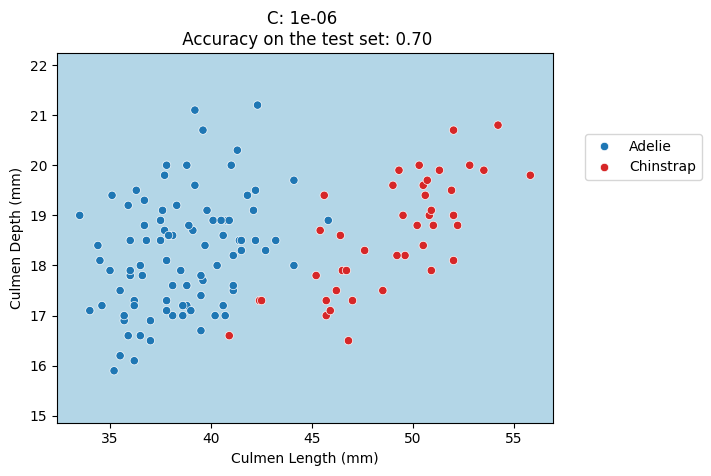

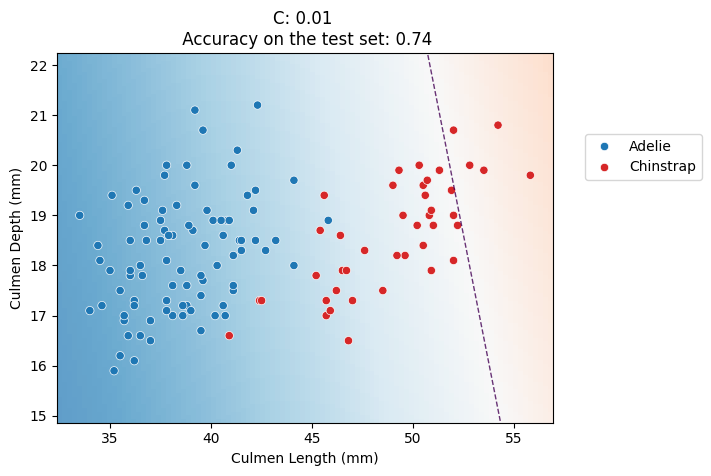

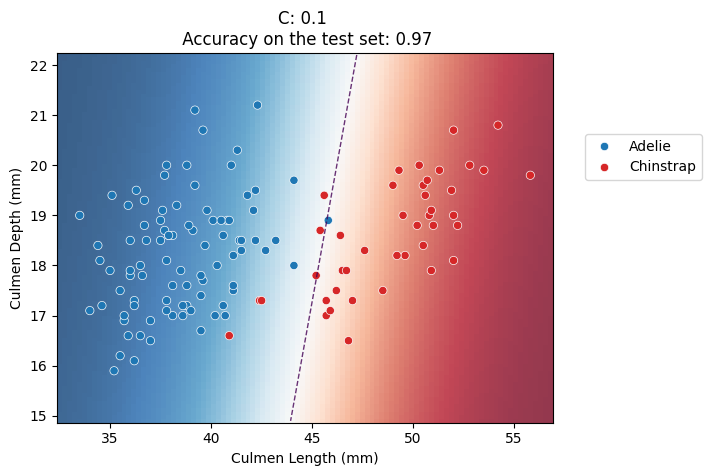

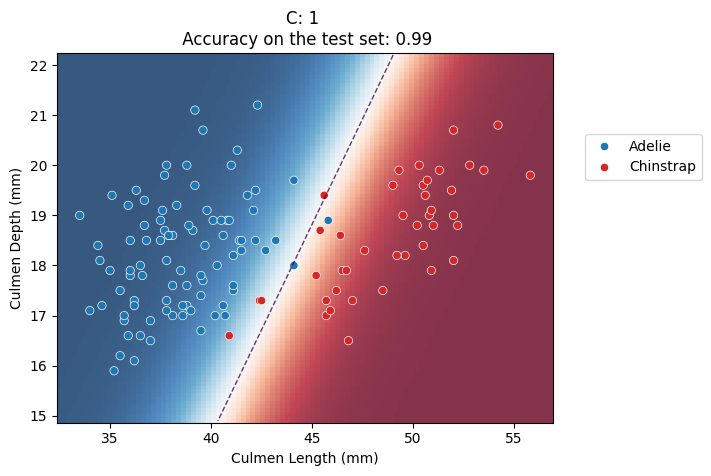

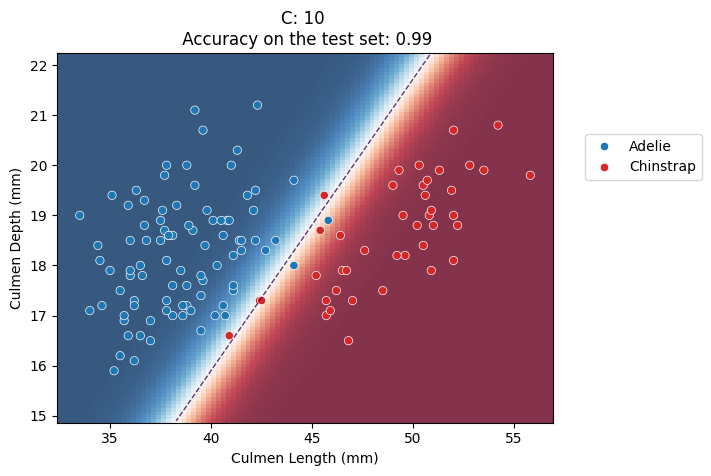

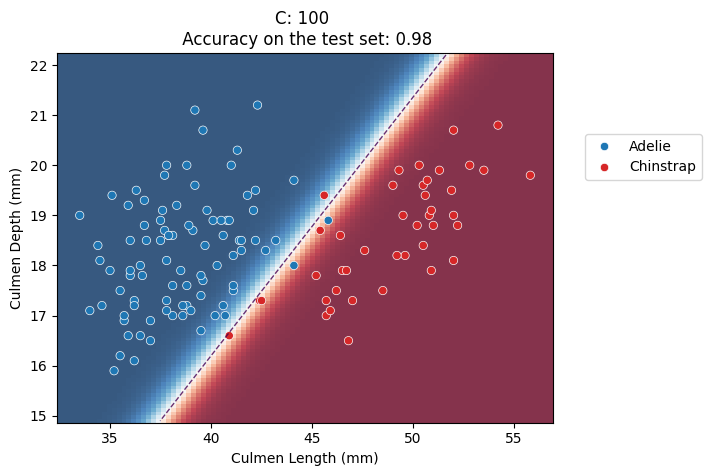

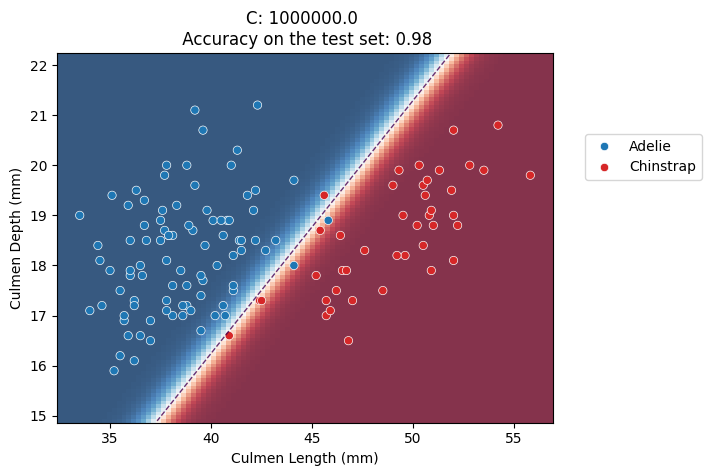

In [148]:
# Creating our predictive model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
                            # Standard Scaler
                            StandardScaler(), 
                            # Logistic Regression
                            LogisticRegression())

Cs = [1e-6, 0.01, 0.1, 1, 10, 100, 1e6]


for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    plot_decision_boundary(logistic_regression)

On this series of plots we can observe several important points. Regarding the confidence on the predictions:
- 
For low values of C (strong regularization), the classifier is less confident in its predictions. We are enforcing a spread sigmoid.- 

For high values of C (weak regularization), the classifier is more confident: the areas with dark blue (very confident in predicting “Adelie”) and dark red (very confident in predicting “Chinstrap”) nearly cover the entire feature space. We are enforcing a steep sigmoid.

To answer the next question, think that misclassified data points are more costly when the classifier is more confident on the decision. Decision rules are mostly driven by avoiding such cost. From the previous observations we can then deduce t- hat:

The smaller the C (the stronger the regularization), the lower the cost of a misclassification. As more data points lay in the low-confidence zone, the more the decision rules are influenced almost uniformly by all the data points. This leads to a less expressive model, which may und- erfit.

The higher the value of C (the weaker the regularization), the more the decision is influenced by a few training points very close to the boundary, where decisions are costly. Remember that models may overfit if the number of samples in the training set is too small, as at least a minimum of samples is needed to average the noise out.

The orientation is the result of two factors: minimizing the number of misclassified training points with high confidence and their distance to the decision boundary (notice how the contour line tries to align with the most misclassified data points in the dark-colored zone). This is closely related to the value of the weights of the model, which is explained in the next part of the exercise.

Finally, for small values of C the position of the decision boundary is affected by the class imbalance: when C is near zero, the model predicts the majority class (as seen in the training set) everywhere in the feature space. In our case, there are approximately two times more “Adelie” than “Chinstrap” penguins. This explains why the decision boundary is shifted to the right when C gets smaller. Indeed, the most regularized model predicts light blue almost everywhere in the feature space.

## Impact of regularization on the weights

In [149]:
lr_weights = []

for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    coefs = logistic_regression[-1].coef_[0]
    lr_weights.append(pd.Series(coefs, index=culmen_columns))

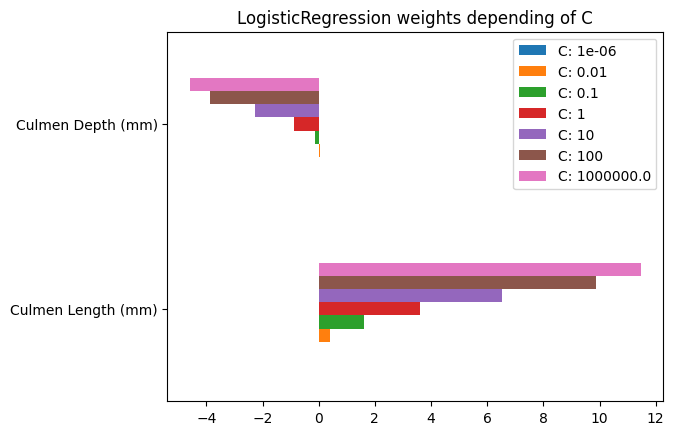

In [150]:
lr_weights = pd.concat(lr_weights, axis=1, keys=[f"C: {C}" for C in Cs])
lr_weights.plot.barh()
_ = plt.title("LogisticRegression weights depending of C")

As small C provides a more regularized model, it shrinks the weights values toward zero, as in the Ridge model.

In particular, with a strong penalty (e.g. C = 0.01), the weight of the feature named “Culmen Depth (mm)” is almost zero. It explains why the decision separation in the plot is almost perpendicular to the “Culmen Length (mm)” feature.

For even stronger penalty strengths (e.g. C = 1e-6), the weights of both features are almost zero. It explains why the decision separation in the plot is almost constant in the feature space: the predicted probability is only based on the intercept parameter of the model (which is never regularized).

### Impact of regularization on LR with non-linear feature engineering


Use the plot_decision_boundary function to repeat the experiment using a non-linear feature engineering pipeline. For such purpose, insert Nystroem(kernel="rbf", gamma=1, n_components=100) between the StandardScaler and the LogisticRegression steps.

- Does the value of C still impact the position of the decision boundary and the confidence of the model?

- What can you say about the impact of C on the underfitting vs overfitting trade-off?

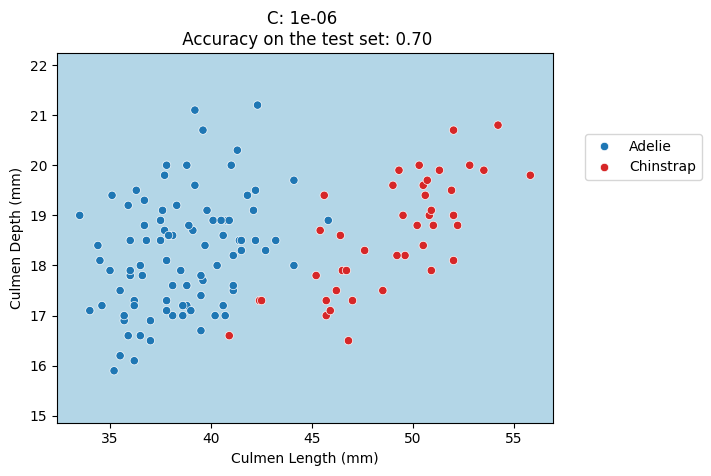

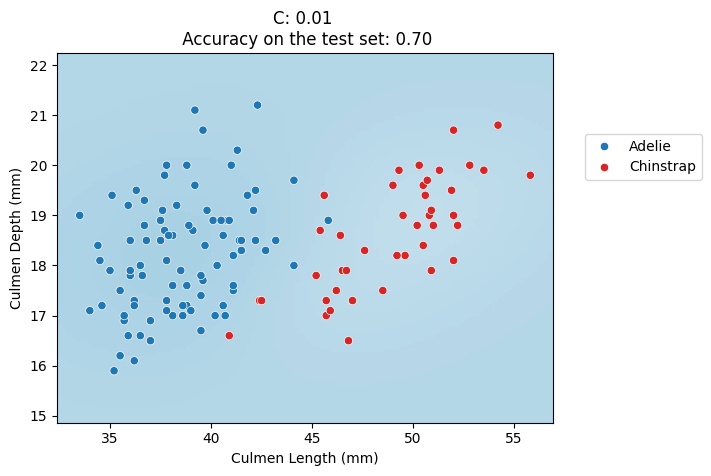

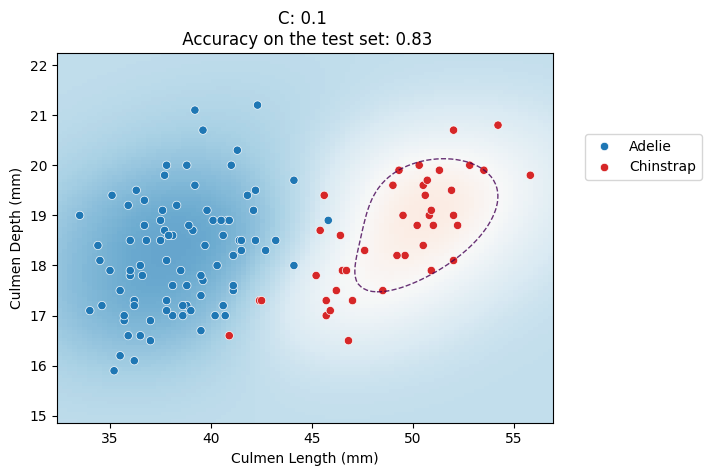

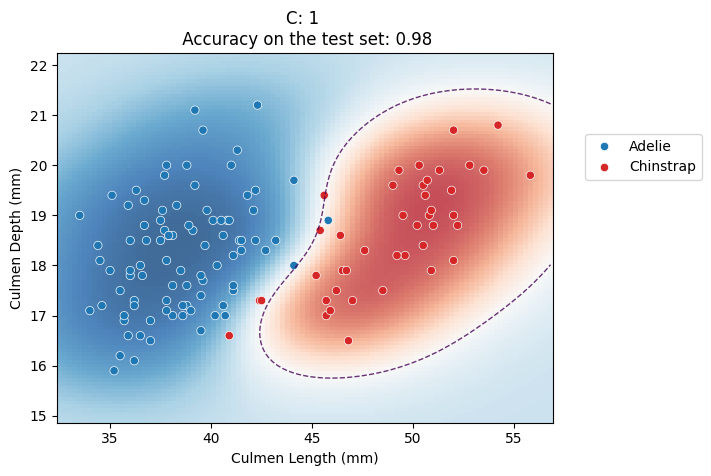

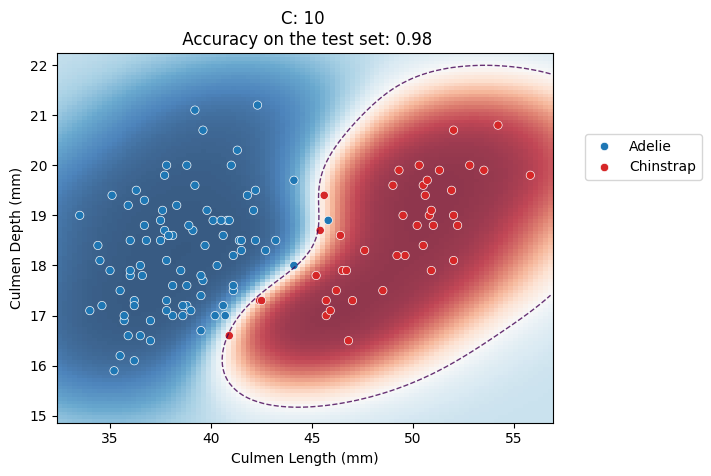

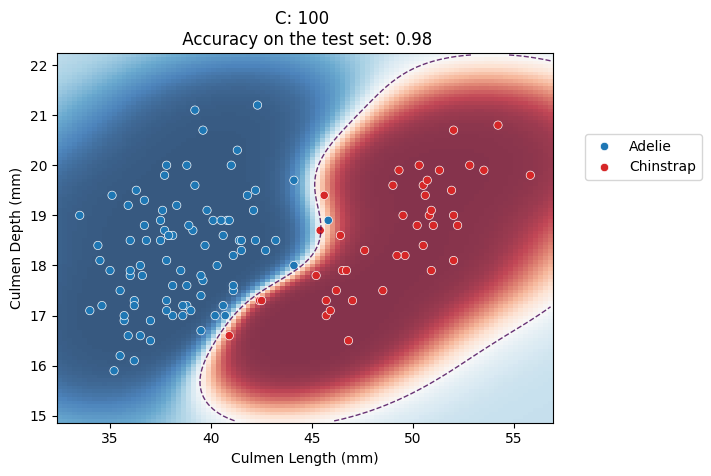

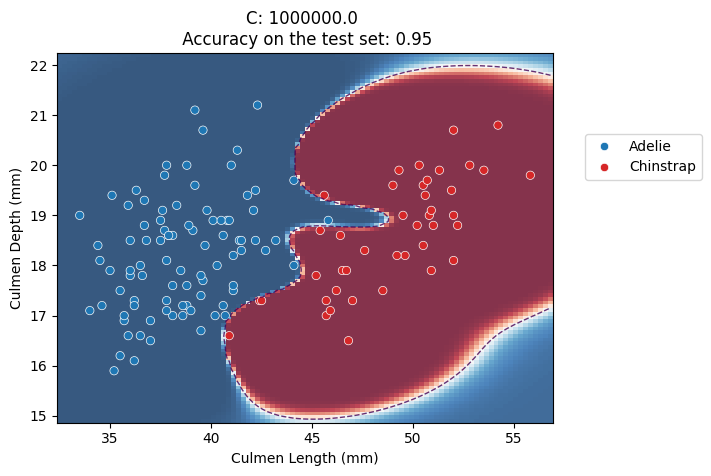

In [152]:

# solution
classifier = make_pipeline(
    StandardScaler(),
    Nystroem(kernel="rbf", gamma=1.0, n_components=100, random_state=0),
    LogisticRegression(max_iter=1000),
)

for C in Cs:
    classifier.set_params(logisticregression__C=C)
    plot_decision_boundary(classifier)

- For the lowest values of C, the overall pipeline underfits: it predicts the majority class everywhere, as previously.
- 
When C increases, the models starts to predict some datapoints from the “Chinstrap” class but the model is not very confident anywhere in the feature space.- 

The decision boundary is no longer a straight line: the linear model is now classifying in the 100-dimensional feature space created by the Nystroem transformer. As are result, the decision boundary induced by the overall pipeline is now expressive enough to wrap around the minority clas- s.

For C = 1 in particular, it finds a smooth red blob around most of the “Chinstrap” data points. When moving away from the data points, the model is less confident in its predictions and again tends to predict the majority class according to the proportion in the training - set.

For higher values of C, the model starts to overfit: it is very confident in its predictions almost everywhere, but it should not be trusted: the model also makes a larger number of mistakes on the test set (not shown in the plot) while adopting a very curvy decision boundary to attempt fitting all the training points, including the noisy ones at the frontier between the two classes. This makes the decision boundary very sensitive to the sampling of the training set and as a result, it does not generalize well in that region. This is confirmed by the (slightly) lower accuracy on the test set.

Finally, we can also note that the linear model on the raw features was as good or better than the best model using non-linear feature engineering. So in this case, we did not really need this extra complexity in our pipeline. Simpler is better!

So to conclude, when using non-linear feature engineering, it is often possible to make the pipeline overfit, even if the original feature space is low-dimensional. As a result, it is important to tune the regularization parameter in conjunction with the parameters of the transformers (e.g. tuning gamma would be important here). This has a direct impact on the certainty of the predictions.

# Wrap Up Quiz

In [222]:
# DF
df_url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv"

ames_housing = pd.read_csv(df_url)

target_name = "SalePrice"

data = ames_housing.drop(columns=target_name)

target = ames_housing[target_name]


numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data = data[numerical_features]

In [223]:
std_ridge_reg = make_pipeline(
                    # Standardise fields
                    StandardScaler(),
                    # Add the regression model
                    Ridge(alpha=0, solver="cholesky")
                             )


cv_results = cross_validate(
    std_ridge_reg,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.87857e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.43133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.17817e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\users\marvi\onedrive\documents\phd folder\fa23 semester\pr

In [225]:
# Getting your  coefs

coefs = [ est[-1].coef_ for est in cv_results["estimator"] ]

weights_std_ridge_reg = pd.DataFrame(coefs, columns=data.columns)


weights_std_ridge_reg["GarageCars"].std()

4126.064419210084

In [226]:
std_ridge_reg = make_pipeline(
                    # Standardise fields
                    StandardScaler(),
                    # Add the regression model
                    Ridge(alpha=1, solver="cholesky")
                             )


cv_results = cross_validate(
    std_ridge_reg,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)


# Getting your  coefs

coefs = [ est[-1].coef_ for est in cv_results["estimator"] ]

weights_std_ridge_reg = pd.DataFrame(coefs, columns=data.columns)

weights_std_ridge_reg["GarageCars"].std()

2895.2876461016035

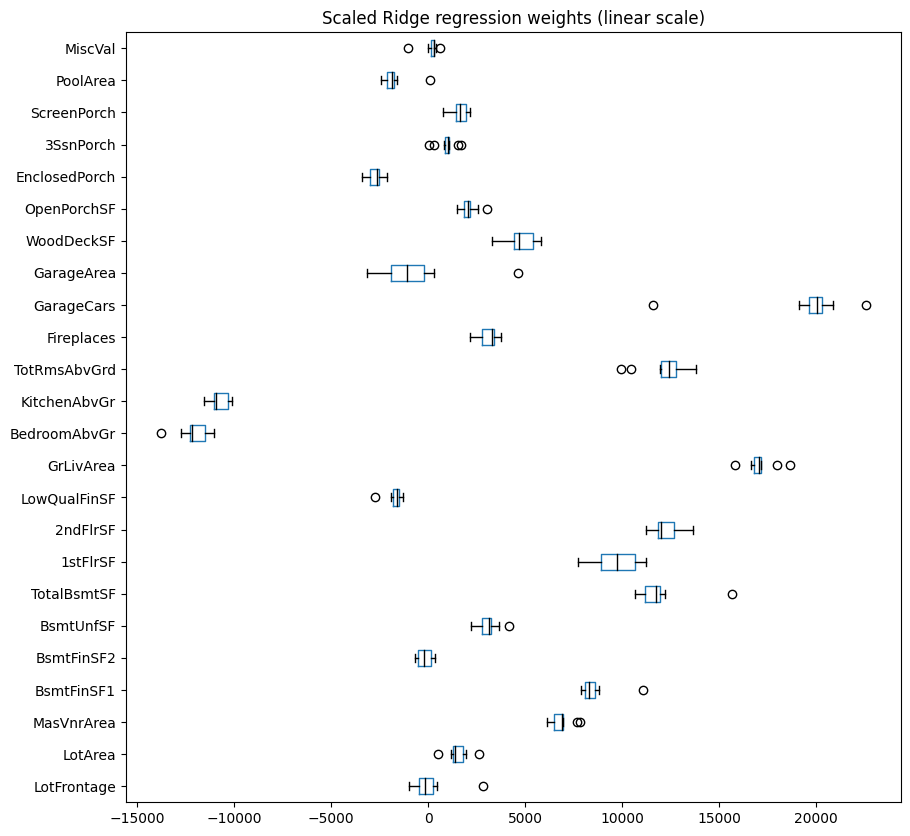

In [175]:
# Lets look at the variations
color = {"whiskers": "black", "medians": "black", "caps": "black"}

fig, ax = plt.subplots(figsize=(10, 10))

weights_std_ridge_reg.plot.box(color=color, vert=False, ax=ax)

_ = ax.set(title="Scaled Ridge regression weights (linear scale)")

In [227]:
# Dropping Garage Area
data_2 = data.drop("GarageArea", axis=1)

std_ridge_reg_2 = make_pipeline(
                    # Standardise fields
                    StandardScaler(),
                    # Add the regression model
                    Ridge(alpha=1, solver="cholesky")
                             )


cv_results = cross_validate(
    std_ridge_reg_2,
    # Use new dataset
    data_2,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)


# Getting your  coefs

coefs = [ est[-1].coef_ for est in cv_results["estimator"] ]

weights_std_ridge_reg_2 = pd.DataFrame(coefs, columns=data_2.columns)

weights_std_ridge_reg_2["GarageCars"].std()

1305.139394188627

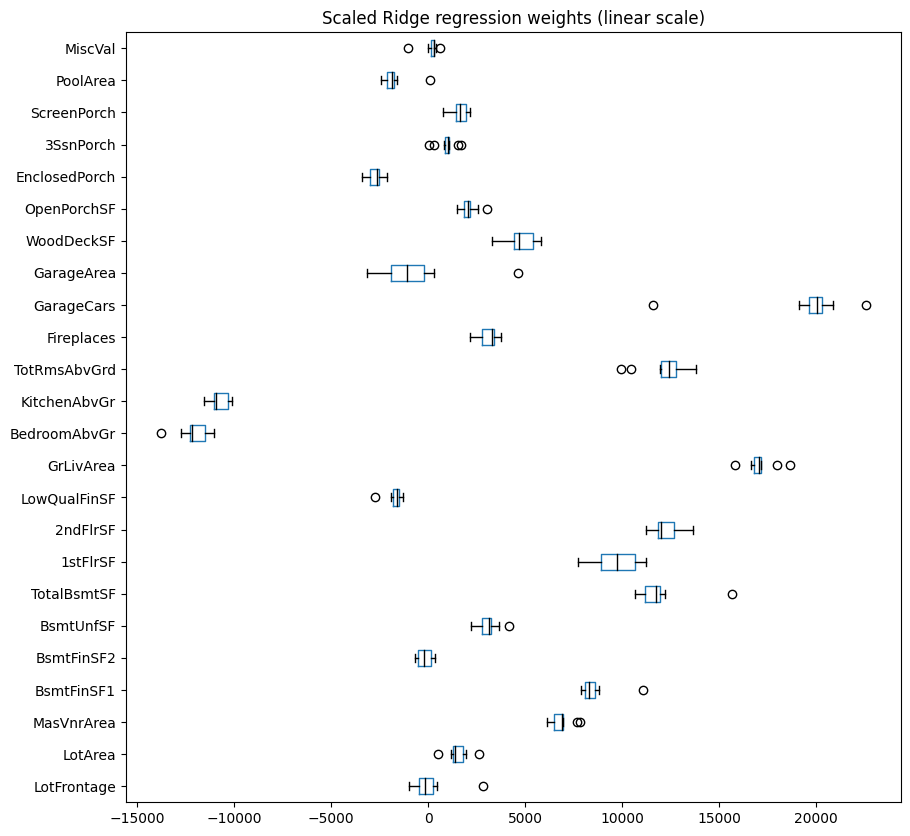

In [228]:
# Lets look at the variations
color = {"whiskers": "black", "medians": "black", "caps": "black"}

fig, ax = plt.subplots(figsize=(10, 10))

weights_std_ridge_reg.plot.box(color=color, vert=False, ax=ax)

_ = ax.set(title="Scaled Ridge regression weights (linear scale)")

In [187]:
data.corr()[["GarageArea", "GrLivArea"]]

GarageArea  GrLivArea
LotFrontage      0.323663   0.368392
LotArea          0.180403   0.263116
MasVnrArea       0.372567   0.389893
BsmtFinSF1       0.296970   0.208171
BsmtFinSF2      -0.018227  -0.009640
BsmtUnfSF        0.183303   0.240257
TotalBsmtSF      0.486665   0.454868
1stFlrSF         0.489782   0.566024
2ndFlrSF         0.138347   0.687501
LowQualFinSF    -0.067601   0.134683
GrLivArea        0.468997   1.000000
BedroomAbvGr     0.065253   0.521270
KitchenAbvGr    -0.064433   0.100063
TotRmsAbvGrd     0.337822   0.825489
Fireplaces       0.269141   0.461679
GarageCars       0.882475   0.467247
GarageArea       1.000000   0.468997
WoodDeckSF       0.224666   0.247433
OpenPorchSF      0.241435   0.330224
EnclosedPorch   -0.121777   0.009113
3SsnPorch        0.035087   0.020643
ScreenPorch      0.051412   0.101510
PoolArea         0.061047   0.170205
MiscVal         -0.027400  -0.002416

In [387]:
alphas = np.logspace(-3, 3, num=101)

data_2 = data.drop("GarageArea", axis=1)

std_ridge_reg_3 = make_pipeline(
                    # Standardise fields
                    StandardScaler(),
                    # Add the regression model
                    RidgeCV(alphas=alphas, store_cv_values=True)
                             )


cv_results = cross_validate(
    # Use corresponding regression model
    std_ridge_reg_3,
    # Use new dataset
    data_2,
    target,
    cv=10,
    return_train_score=True,
    return_estimator=True,
)

# Cast into a dataframe
cv_results_df = pd.DataFrame(cv_results)


# # Getting your  coefs
# coefs = [ est[-1].coef_ for est in cv_results["estimator"] ]

# weights_std_ridge_reg_3 = pd.DataFrame(coefs, columns=data_2.columns)

# weights_std_ridge_reg_3["GarageCars"].std()

In [388]:
test_scores_num = cv_results_df["test_score"]

test_scores_num

0    0.767615
1    0.796449
2    0.804622
3    0.674943
4    0.776622
5    0.762680
6    0.754177
7    0.709086
8    0.345969
9    0.793961
Name: test_score, dtype: float64

In [389]:
# Alphas from pipeline

alpha_list = [ est[-1].alpha_ for est in cv_results["estimator"] ]

alpha_list

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

## Pipeline for both Numerical and Categorical Predictors

In [390]:
ames_housing = pd.read_csv(df_url)


cat_features = ames_housing.select_dtypes("object").columns


num_features =  [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]


target_name = "SalePrice"

target = ames_housing[target_name]



df = ames_df[num_features + list(cat_features)]

# Defining the Transformers

cat_trans = Pipeline(
                steps=[
                        # Encoding 
                        ("encoder", OneHotEncoder(handle_unknown="ignore"))
                      ]
                    )

num_trans = Pipeline(
                steps=[
                    # Standardise
                    ("std", StandardScaler())
                      ] 
                    )


# Full pre_processor
full_pre_processor = ColumnTransformer(
                    transformers=[
                        # Numerical Feature Transformations
                        ("numerical", num_trans, num_features),
                        # Categorical Feature Transformations
                        ("categorical", cat_trans, cat_features)
                    ]
                                    )


ridge_reg_pipeline = Pipeline(
                        steps=[
                            # 1st step
                            ("pre_processor", full_pre_processor),
                            # 2nd Step
                            ("classifier", RidgeCV(alphas=alphas))
                        ]
                    )


ridge_reg_pipeline

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'WoodDeckSF',
                                                   'OpenP...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03])))])

In [391]:
cv_results_2 = cross_validate(
    # Use corresponding regression model
    ridge_reg_pipeline,
    # Use new dataset
    df,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

cv_results_2 = pd.DataFrame(cv_results_2)


In [392]:
# Comparing Simpler Numerical model to this model
test_scores_num_cat = cv_results_2_df["test_score"]

test_scores_num_cat

0    0.907866
1    0.901292
2    0.914140
3    0.772356
4    0.868329
5    0.881816
6    0.880161
7    0.892860
8    0.574604
9    0.892646
Name: test_score, dtype: float64

### More feature Engineering

In [393]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


# Defining the Transformers
cat_trans = Pipeline(
                steps=[
                        # Encoding 
                        ("encoder", OneHotEncoder(handle_unknown="ignore"))
                      ]
                    )

num_trans = Pipeline(
                steps=[
                    # Standardise
                    ("spline_transformer", SplineTransformer())
                      ] 
                    )


# Full pre_processor
full_pre_processor = ColumnTransformer(
                    transformers=[
                        # Numerical Feature Transformations
                        ("numerical", num_trans, num_features),
                        # Categorical Feature Transformations
                        ("categorical", cat_trans, cat_features)
                    ]
                                    )


ridge_reg_pipeline_2 = Pipeline(
                        steps=[
                            # 1st step
                            ("pre_processor", full_pre_processor),
                            # 2nd Step
                            ("interactions", Nystroem(kernel="poly", degree=2, n_components=300)),
                            # 3rd Step
                            ("classifier", RidgeCV(alphas=alphas))
                        ]
                    )


ridge_reg_pipeline_2

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('spline_transformer',
                                                                   SplineTransformer())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', '...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03])))])

In [394]:
cv_results_3 = cross_validate(
    # Use the corresponding regression model
    ridge_reg_pipeline_2,
    # Use the new dataset
    df,
    target,
    cv=10,
    return_train_score=True,
    return_estimator=True,
)


# Cast into a DF
cv_results_3_df = pd.DataFrame(cv_results_3)


test_3_scores = cv_results_3_df["test_score"]

In [395]:
test_3_scores

0    0.897692
1    0.885515
2    0.907103
3    0.812250
4    0.870204
5    0.898648
6    0.892975
7    0.876292
8    0.771371
9    0.892692
Name: test_score, dtype: float64